In [1]:
def confusion_matrix_article(Y,Z):
    print(type(Y),type(Z))
    
    
    np.seterr(divide='ignore', invalid='ignore')
    #print(np.diag(Y[0]))
    #print(sum(Z[0]))
    M = np.zeros((Y.shape[1],Y.shape[1]))
    W = np.zeros(Y.shape[1])
    print("M is ", M.shape)
    for i in range(len(Y)):
        if(np.allclose(Y[i],Z[i])):
            print(i, " - Y and Z are equal")
            C = np.diag(Y[i])
            print(C.shape)
        else:
            Y_complement_Z = np.where((Y[i]-Z[i])<0, 0, (Y[i]-Z[i]))
            print("|Yi\Zi| = ",sum(Y_complement_Z), ", shape = ", Y_complement_Z.shape)
            Z_complement_Y = np.where((Z[1]-Y[1])<0, 0, (Z[1]-Y[1]))
            print("|Zi\Yi| = ", sum(Z_complement_Y), ", shape = ", Y_complement_Z.shape)
            #Y_intersect_Z = (Y[i] & Z[i])
            
            for j in range(Y.shape[1]):
                if(Y[i][j]==Z[i][j]):
                    W[j]=Y[i][j]
                else:
                    W[j]=0
            
            Y_intersect_Z = W
            #### it will be a 861 x 861 matrix
            if (sum(Y_complement_Z)==0):  #if |Yi\Zi|=0
                # 𝐶=[(𝑌i∩𝑍i)⊗(𝑍i\𝑌i)+|𝑌i|⋅𝑑𝑖𝑎𝑔(𝑌i)]/|𝑍i|
                C1 = np.kron(Y_intersect_Z,Z_complement_Y)
                C2 = np.dot(sum(Y[i]),np.diag(Y[i]))
                C1 = C1.reshape(Y.shape[1],Y.shape[1]) 
                C = (C1+C2)/sum(Z[i])
            elif (sum(Z_complement_Y)==0):
                print("i = ", i)
                print("condiçao |Zi\Yi| =  0")
                print("kron:", np.kron(Y_complement_Z,Z[i]))
                C1 = np.kron(Y_complement_Z,Z[i])/sum(Z[i])
                if (np.isnan(np.min(C1))):
                    print("Tem nan em C1")
                    C1[np.isnan(C1)] = 0
                print("C1 = ", C1)
                C2 = np.diag(Z[i])
                if (np.isnan(np.min(C2))):
                    print("Tem nan em C1")
                    C2[np.isnan(C2)] = 0
                C1 = C1.reshape(Y.shape[1],Y.shape[1])
                C = C1+C2
            else:
                print("condiçao |Zi\Yi| diferente de 0")
                C1 = np.kron(Y_complement_Z,Z_complement_Y)/sum(Z_complement_Y)
                C2 = np.diag(Y_intersect_Z)
                C1 = C1.reshape(Y.shape[1],Y.shape[1])
                C = C1+C2
            print(C)
            M = M + C
    print("M = ", M)
    return M

In [2]:
def precision_matrix(M):
    #print(M.shape[0])
    rows = M.shape[0]
    columns = M.shape[1]
    sum_column = M.sum(axis=0)
    sum_row = M.sum(axis=1)
    precision_M = np.zeros((columns,rows))
    
    for i in range(columns):
        for j in range(rows):
            #print("sum_column[",i,"] = ",sum_column[i])
            #print("M[",j,"][",i,"] = ", M[j][i] )
            precision_M[j][i]= (M[j][i])/(sum_column[i])
            #print("precision_M[",j,"][",i,"] = ", precision_M[j][i] )
    
    if (np.isnan(np.min(precision_M))):
                    precision_M[np.isnan(precision_M)] = 0
    
    print("precision_M = ", precision_M)
    
    return precision_M

In [3]:
from IPython.display import display
!conda info


     active environment : tese
    active env location : /Users/marcelo_palermo/anaconda3/envs/tese
            shell level : 2
       user config file : /Users/marcelo_palermo/.condarc
 populated config files : /Users/marcelo_palermo/.condarc
          conda version : 23.5.0
    conda-build version : 3.25.0
         python version : 3.10.11.final.0
       virtual packages : __archspec=1=x86_64
                          __osx=10.16=0
                          __unix=0=0
       base environment : /Users/marcelo_palermo/anaconda3  (writable)
      conda av data dir : /Users/marcelo_palermo/anaconda3/etc/conda
  conda av metadata url : None
           channel URLs : https://conda.anaconda.org/conda-forge/osx-64
                          https://conda.anaconda.org/conda-forge/noarch
                          https://repo.anaconda.com/pkgs/main/osx-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/osx-64
     

In [4]:
def separate_proteins(filename):
    
    
    training_dataset = pd.read_csv(filename)
    print("Original Data for " + filename)
    display(training_dataset.head(10))
    display(training_dataset.shape)
    #Drop unnecessary columns
    # training_dataset = training_dataset.drop(['Unnamed: 0','Threshold','Desc','OlinkID','UniProt','Panel','Organ','Desc_Column','term','df','sumsq','meansq','statistic'], axis=1)
    training_dataset = training_dataset.drop(['Unnamed: 0','Threshold','OlinkID','UniProt','Panel','term','df','sumsq','meansq','statistic'], axis=1)
    display(training_dataset.head(10))
    display(training_dataset.shape)
    
    
    training_dataframe = pd.DataFrame()
    validation_dataframe = pd.DataFrame()
    
    if(filename.find('train')>0):
        print('This is training file')
        if training_dataframe.empty:
            training_dataframe = training_dataset
            print('creating empty dataframe and placing training_dataset into it')
            
        
        
    else: 
        print('This is validation file')
    
    
    display(training_dataframe.head(10))
    
    return list(training_dataset['Assay'].values)
    

In [5]:
def build_ML_data_prep (filename,df,age):
    print("Processing file " + filename)
    training_dataset1 = pd.read_csv(filename)
    for protein in training_dataset1['Assay']:
        #print(protein)
        if protein in df.columns:
            df.loc[df['BMI']==age, [protein]] = 1
        else:
            df.loc[df['BMI']==age, [protein]] = 0
    display(df.head())
    return(df)
    
    

In [6]:
import pandas as pd
import numpy as np
import re

### Read MGH Olink ANOVA dataset for the referred category

In [7]:
category = ['age','BMI']
category_range_age = range(1,6)
category_range_BMI = range(0,5)

In [8]:
for i in category_range_age:
    print("Age category:", category_range_age[i-1])
print("\r")
for i in category_range_BMI:
    print("BMI category:", category_range_BMI[i])

Age category: 1
Age category: 2
Age category: 3
Age category: 4
Age category: 5

BMI category: 0
BMI category: 1
BMI category: 2
BMI category: 3
BMI category: 4


In [9]:
import glob, os
files_to_prepare = []
files_to_prepare_train = []

split_factor_file_train = "60_40"
split_factor_file_validation = "60_40"

listing = glob.glob('/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/' + split_factor_file_train + '/MGH_ANOVA_BMI_categories_train_BMI_*.csv')
for filename in listing:
    if "cut" in filename:
        print("NOT INCLUDED - Found cut in ", filename)
    else:
        print(filename)
        files_to_prepare.append(filename)
        
## BMI Category 5 training & validation is Unknown --> Discarded
## BMI Category 1 training is empty --> discarded

files_to_prepare.sort()

/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_0_Age_5.csv
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_1_Age_3.csv
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_1_Age_2.csv
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_1_Age_5.csv
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_1_Age_4.csv
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_2_Age_1.csv
NOT INCLUDED - Found cut in  /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_2_Age_4_cut.csv
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_4

In [10]:
files_to_prepare

['/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_0_Age_5.csv',
 '/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_1_Age_2.csv',
 '/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_1_Age_3.csv',
 '/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_1_Age_4.csv',
 '/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_1_Age_5.csv',
 '/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_2_Age_1.csv',
 '/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_2_Age_2.csv',
 '/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/M

In [11]:
len(files_to_prepare)

19

### We load validation files just to capture ALL proteins
- Some proteins will appear only in validation
- Some proteins will appear only in train
- We need to ensure ALL columns for Age will be the same in validation and train sets

In [12]:
files_to_prepare_train = files_to_prepare
files_to_prepare_validation = []

listing = glob.glob('/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/' + split_factor_file_validation + '/MGH_ANOVA_BMI_categories_validation_BMI_*.csv')
for filename in listing:
    if "cut" in filename:
        print("NOT INCLUDED - Found cut in ", filename)
    else:
        print(filename)
        files_to_prepare_validation.append(filename)
        
        
        
## BMI Category 5 training & validation is Unknown --> Discarded
## BMI Category 1 training is empty --> discarded

files_to_prepare_validation.sort()

/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_BMI_1_Age_3.csv
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_BMI_1_Age_2.csv
NOT INCLUDED - Found cut in  /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_BMI_2_Age_3_cut.csv
NOT INCLUDED - Found cut in  /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_BMI_1_Age_3_cut.csv
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_BMI_1_Age_5.csv
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_BMI_1_Age_4.csv
NOT INCLUDED - Found cut in  /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validati

In [13]:
files_to_prepare + files_to_prepare_validation

['/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_0_Age_5.csv',
 '/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_1_Age_2.csv',
 '/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_1_Age_3.csv',
 '/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_1_Age_4.csv',
 '/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_1_Age_5.csv',
 '/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_2_Age_1.csv',
 '/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_2_Age_2.csv',
 '/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/M

In [14]:
array_protein_names = []
array_each_file = []
for file in (files_to_prepare + files_to_prepare_validation):
    array_each_file = separate_proteins(file)
    array_protein_names = array_protein_names + array_each_file

Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_0_Age_5.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column


(0, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


(0, 6)

This is training file
creating empty dataframe and placing training_dataset into it


,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_1_Age_2.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column


(0, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


(0, 6)

This is training file
creating empty dataframe and placing training_dataset into it


,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_1_Age_3.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column
0,1,PCOLCE,OID20384,Q15113,Cardiometabolic,Timepoint,3,6.754267,2.251422,25.749438,0.000010,0.014189,Significant,Low tissue specificity,Procollagen C-endopeptidase enhancer 1,Low_tissue_specificity
1,2,CCL28,OID20569,Q9NRJ3,Inflammation,Timepoint,3,13.776729,4.592243,20.396325,0.000034,0.024961,Significant,Tissue enriched: salivary gland,C-C motif chemokine 28,Tissue_enriched_salivary_gland
2,3,FGFBP1,OID21507,Q14512,Oncology,Timepoint,3,97.879666,32.626555,17.856757,0.000068,0.025869,Significant,"Tissue enhanced: esophagus, vagina",Fibroblast growth factor-binding protein 1,Tissue_enhanced_esophagus_vagina
3,4,MDK,OID21489,P21741,Oncology,Timepoint,3,72.990818,24.330273,17.735945,0.000070,0.025869,Significant,Tissue enhanced: ovary,Midkine,Tissue_enhanced_ovary
4,5,CCL21,OID20686,O00585,Inflammation,Timepoint,3,21.376349,7.125450,16.016393,0.000118,0.034758,Significant,Tissue enriched: lymphoid tissue,C-C motif chemokine 21,Tissue_enriched_lymphoid_tissue


(5, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column
0,PCOLCE,0.000010,0.014189,Low tissue specificity,Procollagen C-endopeptidase enhancer 1,Low_tissue_specificity
1,CCL28,0.000034,0.024961,Tissue enriched: salivary gland,C-C motif chemokine 28,Tissue_enriched_salivary_gland
2,FGFBP1,0.000068,0.025869,"Tissue enhanced: esophagus, vagina",Fibroblast growth factor-binding protein 1,Tissue_enhanced_esophagus_vagina
3,MDK,0.000070,0.025869,Tissue enhanced: ovary,Midkine,Tissue_enhanced_ovary
4,CCL21,0.000118,0.034758,Tissue enriched: lymphoid tissue,C-C motif chemokine 21,Tissue_enriched_lymphoid_tissue


(5, 6)

This is training file
creating empty dataframe and placing training_dataset into it


,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column
0,PCOLCE,0.000010,0.014189,Low tissue specificity,Procollagen C-endopeptidase enhancer 1,Low_tissue_specificity
1,CCL28,0.000034,0.024961,Tissue enriched: salivary gland,C-C motif chemokine 28,Tissue_enriched_salivary_gland
2,FGFBP1,0.000068,0.025869,"Tissue enhanced: esophagus, vagina",Fibroblast growth factor-binding protein 1,Tissue_enhanced_esophagus_vagina
3,MDK,0.000070,0.025869,Tissue enhanced: ovary,Midkine,Tissue_enhanced_ovary
4,CCL21,0.000118,0.034758,Tissue enriched: lymphoid tissue,C-C motif chemokine 21,Tissue_enriched_lymphoid_tissue


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_1_Age_4.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column


(0, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


(0, 6)

This is training file
creating empty dataframe and placing training_dataset into it


,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_1_Age_5.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column
0,1,PTN,OID20083,P21246,Cardiometabolic,Timepoint,3,134.465329,44.821776,30.980492,4.094466e-07,0.000603,Significant,"Tissue enhanced: brain, parathyroid gland",Pleiotrophin,Tissue_enhanced_brain_parathyroid_gland


(1, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column
0,PTN,4.094466e-07,0.000603,"Tissue enhanced: brain, parathyroid gland",Pleiotrophin,Tissue_enhanced_brain_parathyroid_gland


(1, 6)

This is training file
creating empty dataframe and placing training_dataset into it


,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column
0,PTN,4.094466e-07,0.000603,"Tissue enhanced: brain, parathyroid gland",Pleiotrophin,Tissue_enhanced_brain_parathyroid_gland


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_2_Age_1.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column


(0, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


(0, 6)

This is training file
creating empty dataframe and placing training_dataset into it


,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_2_Age_2.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column
0,1,PTN,OID20083,P21246,Cardiometabolic,Timepoint,3,127.744539,42.581513,15.149725,0.000010,0.004339,Significant,"Tissue enhanced: brain, parathyroid gland",Pleiotrophin,Tissue_enhanced_brain_parathyroid_gland
1,2,SDC1,OID20169,P18827,Cardiometabolic,Timepoint,3,57.660000,19.220000,15.985718,0.000006,0.004339,Significant,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1
2,3,SFRP1,OID20984,Q8N474,Neurology,Timepoint,3,159.092272,53.030757,14.846795,0.000011,0.004339,Significant,"Tissue enhanced: breast, choroid plexus",Secreted frizzled-related protein 1,Tissue_enhanced_breast_choroid_plexus
3,4,SMOC1,OID21461,Q9H4F8,Oncology,Timepoint,3,62.057239,20.685746,14.757877,0.000012,0.004339,Significant,"Tissue enhanced: brain, liver",SPARC-related modular calcium-binding protein 1,Tissue_enhanced_brain_liver
4,5,HGF,OID20656,P14210,Inflammation,Timepoint,3,40.224933,13.408311,12.303356,0.000045,0.013249,Significant,Tissue enriched: placenta,Hepatocyte growth factor,Tissue_enriched_placenta
5,6,CCL24,OID20772,O00175,Inflammation,Timepoint,3,23.992325,7.997442,11.140099,0.000090,0.020970,Significant,"Group enriched: intestine, lymphoid tissue",C-C motif chemokine 24,Group_enriched_intestine_lymphoid_tissue
6,7,PRL,OID21033,P01236,Neurology,Timepoint,3,17.814402,5.938134,10.968251,0.000100,0.020970,Significant,Tissue enriched: pituitary gland,Prolactin,Tissue_enriched_pituitary_gland
7,8,SPON1,OID20759,Q9HCB6,Inflammation,Timepoint,3,9.954885,3.318295,10.062367,0.000176,0.032476,Significant,Tissue enhanced: gallbladder,Spondin-1,Tissue_enhanced_gallbladder
8,9,CLC,OID20126,Q05315,Cardiometabolic,Timepoint,3,5.155586,1.718529,9.404238,0.000272,0.044470,Significant,Tissue enriched: bone marrow,Galectin-10,Tissue_enriched_bone_marrow


(9, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column
0,PTN,0.000010,0.004339,"Tissue enhanced: brain, parathyroid gland",Pleiotrophin,Tissue_enhanced_brain_parathyroid_gland
1,SDC1,0.000006,0.004339,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1
2,SFRP1,0.000011,0.004339,"Tissue enhanced: breast, choroid plexus",Secreted frizzled-related protein 1,Tissue_enhanced_breast_choroid_plexus
3,SMOC1,0.000012,0.004339,"Tissue enhanced: brain, liver",SPARC-related modular calcium-binding protein 1,Tissue_enhanced_brain_liver
4,HGF,0.000045,0.013249,Tissue enriched: placenta,Hepatocyte growth factor,Tissue_enriched_placenta
5,CCL24,0.000090,0.020970,"Group enriched: intestine, lymphoid tissue",C-C motif chemokine 24,Group_enriched_intestine_lymphoid_tissue
6,PRL,0.000100,0.020970,Tissue enriched: pituitary gland,Prolactin,Tissue_enriched_pituitary_gland
7,SPON1,0.000176,0.032476,Tissue enhanced: gallbladder,Spondin-1,Tissue_enhanced_gallbladder
8,CLC,0.000272,0.044470,Tissue enriched: bone marrow,Galectin-10,Tissue_enriched_bone_marrow


(9, 6)

This is training file
creating empty dataframe and placing training_dataset into it


,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column
0,PTN,0.000010,0.004339,"Tissue enhanced: brain, parathyroid gland",Pleiotrophin,Tissue_enhanced_brain_parathyroid_gland
1,SDC1,0.000006,0.004339,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1
2,SFRP1,0.000011,0.004339,"Tissue enhanced: breast, choroid plexus",Secreted frizzled-related protein 1,Tissue_enhanced_breast_choroid_plexus
3,SMOC1,0.000012,0.004339,"Tissue enhanced: brain, liver",SPARC-related modular calcium-binding protein 1,Tissue_enhanced_brain_liver
4,HGF,0.000045,0.013249,Tissue enriched: placenta,Hepatocyte growth factor,Tissue_enriched_placenta
5,CCL24,0.000090,0.020970,"Group enriched: intestine, lymphoid tissue",C-C motif chemokine 24,Group_enriched_intestine_lymphoid_tissue
6,PRL,0.000100,0.020970,Tissue enriched: pituitary gland,Prolactin,Tissue_enriched_pituitary_gland
7,SPON1,0.000176,0.032476,Tissue enhanced: gallbladder,Spondin-1,Tissue_enhanced_gallbladder
8,CLC,0.000272,0.044470,Tissue enriched: bone marrow,Galectin-10,Tissue_enriched_bone_marrow


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_2_Age_3.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column


(0, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


(0, 6)

This is training file
creating empty dataframe and placing training_dataset into it


,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_2_Age_4.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column
0,1,DLK1,OID20295,P80370,Cardiometabolic,Timepoint,3,18.668673,6.222891,15.930223,1.136657e-07,0.000042,Significant,"Group enriched: adrenal gland, pituitary gland...",Protein delta homolog 1,Group_enriched_adrenal_gland_pituitary_gland_p...
1,2,PTN,OID20083,P21246,Cardiometabolic,Timepoint,3,177.344437,59.114812,16.352611,8.101221e-08,0.000042,Significant,"Tissue enhanced: brain, parathyroid gland",Pleiotrophin,Tissue_enhanced_brain_parathyroid_gland
2,3,REG3A,OID20258,Q06141,Cardiometabolic,Timepoint,3,71.522775,23.840925,15.648256,1.428088e-07,0.000042,Significant,"Group enriched: intestine, pancreas",Regenerating islet-derived protein 3-alpha,Group_enriched_intestine_pancreas
3,4,SDC1,OID20169,P18827,Cardiometabolic,Timepoint,3,75.700615,25.233538,16.288457,8.526714e-08,0.000042,Significant,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1
4,5,SMOC1,OID21461,Q9H4F8,Oncology,Timepoint,3,92.332399,30.777466,15.794222,1.268660e-07,0.000042,Significant,"Tissue enhanced: brain, liver",SPARC-related modular calcium-binding protein 1,Tissue_enhanced_brain_liver
5,6,SFRP1,OID20984,Q8N474,Neurology,Timepoint,3,252.597092,84.199031,15.281165,1.927334e-07,0.000047,Significant,"Tissue enhanced: breast, choroid plexus",Secreted frizzled-related protein 1,Tissue_enhanced_breast_choroid_plexus
6,7,COL6A3,OID20292,P12111,Cardiometabolic,Timepoint,3,43.355903,14.451968,14.982966,2.464327e-07,0.000052,Significant,Tissue enhanced: smooth muscle,Collagen alpha-3(VI) chain,Tissue_enhanced_smooth_muscle
7,8,SCARF2,OID21048,Q96GP6,Neurology,Timepoint,3,5.710664,1.903555,14.507594,3.661861e-07,0.000060,Significant,Low tissue specificity,Scavenger receptor class F member 2,Low_tissue_specificity
8,9,SPON1,OID20759,Q9HCB6,Inflammation,Timepoint,3,30.998312,10.332771,14.579194,3.448644e-07,0.000060,Significant,Tissue enhanced: gallbladder,Spondin-1,Tissue_enhanced_gallbladder
9,10,GPC1,OID21438,P35052,Oncology,Timepoint,3,15.220299,5.073433,13.947171,5.881060e-07,0.000087,Significant,Tissue enhanced: skin 1,Glypican-1,Tissue_enhanced_skin_1


(496, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column
0,DLK1,1.136657e-07,0.000042,"Group enriched: adrenal gland, pituitary gland...",Protein delta homolog 1,Group_enriched_adrenal_gland_pituitary_gland_p...
1,PTN,8.101221e-08,0.000042,"Tissue enhanced: brain, parathyroid gland",Pleiotrophin,Tissue_enhanced_brain_parathyroid_gland
2,REG3A,1.428088e-07,0.000042,"Group enriched: intestine, pancreas",Regenerating islet-derived protein 3-alpha,Group_enriched_intestine_pancreas
3,SDC1,8.526714e-08,0.000042,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1
4,SMOC1,1.268660e-07,0.000042,"Tissue enhanced: brain, liver",SPARC-related modular calcium-binding protein 1,Tissue_enhanced_brain_liver
5,SFRP1,1.927334e-07,0.000047,"Tissue enhanced: breast, choroid plexus",Secreted frizzled-related protein 1,Tissue_enhanced_breast_choroid_plexus
6,COL6A3,2.464327e-07,0.000052,Tissue enhanced: smooth muscle,Collagen alpha-3(VI) chain,Tissue_enhanced_smooth_muscle
7,SCARF2,3.661861e-07,0.000060,Low tissue specificity,Scavenger receptor class F member 2,Low_tissue_specificity
8,SPON1,3.448644e-07,0.000060,Tissue enhanced: gallbladder,Spondin-1,Tissue_enhanced_gallbladder
9,GPC1,5.881060e-07,0.000087,Tissue enhanced: skin 1,Glypican-1,Tissue_enhanced_skin_1


(496, 6)

This is training file
creating empty dataframe and placing training_dataset into it


,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column
0,DLK1,1.136657e-07,0.000042,"Group enriched: adrenal gland, pituitary gland...",Protein delta homolog 1,Group_enriched_adrenal_gland_pituitary_gland_p...
1,PTN,8.101221e-08,0.000042,"Tissue enhanced: brain, parathyroid gland",Pleiotrophin,Tissue_enhanced_brain_parathyroid_gland
2,REG3A,1.428088e-07,0.000042,"Group enriched: intestine, pancreas",Regenerating islet-derived protein 3-alpha,Group_enriched_intestine_pancreas
3,SDC1,8.526714e-08,0.000042,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1
4,SMOC1,1.268660e-07,0.000042,"Tissue enhanced: brain, liver",SPARC-related modular calcium-binding protein 1,Tissue_enhanced_brain_liver
5,SFRP1,1.927334e-07,0.000047,"Tissue enhanced: breast, choroid plexus",Secreted frizzled-related protein 1,Tissue_enhanced_breast_choroid_plexus
6,COL6A3,2.464327e-07,0.000052,Tissue enhanced: smooth muscle,Collagen alpha-3(VI) chain,Tissue_enhanced_smooth_muscle
7,SCARF2,3.661861e-07,0.000060,Low tissue specificity,Scavenger receptor class F member 2,Low_tissue_specificity
8,SPON1,3.448644e-07,0.000060,Tissue enhanced: gallbladder,Spondin-1,Tissue_enhanced_gallbladder
9,GPC1,5.881060e-07,0.000087,Tissue enhanced: skin 1,Glypican-1,Tissue_enhanced_skin_1


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_2_Age_5.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column


(0, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


(0, 6)

This is training file
creating empty dataframe and placing training_dataset into it


,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_3_Age_1.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column


(0, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


(0, 6)

This is training file
creating empty dataframe and placing training_dataset into it


,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_3_Age_2.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column
0,1,PADI2,OID20467,Q9Y2J8,Inflammation,Timepoint,3,19.686427,6.562142,26.574396,1.052014e-08,0.000015,Significant,"Tissue enhanced: brain, skeletal muscle, tongue",Protein-arginine deiminase type-2,Tissue_enhanced_brain_skeletal_muscle_tongue
1,2,DPP10,OID20527,Q8N608,Inflammation,Timepoint,3,9.848162,3.282721,15.013086,3.258387e-06,0.002398,Significant,"Tissue enhanced: adrenal gland, brain, pancreas",Inactive dipeptidyl peptidase 10,Tissue_enhanced_adrenal_gland_brain_pancreas
2,3,TNFRSF9,OID20985,Q07011,Neurology,Timepoint,3,18.397428,6.132476,14.286004,5.068765e-06,0.002487,Significant,Tissue enriched: lymphoid tissue,Tumor necrosis factor receptor superfamily mem...,Tissue_enriched_lymphoid_tissue
3,4,VAMP5,OID20071,O95183,Cardiometabolic,Timepoint,3,14.875853,4.958618,13.363742,9.043443e-06,0.003328,Significant,Low tissue specificity,Vesicle-associated membrane protein 5,Low_tissue_specificity
4,5,NEFL,OID20871,P07196,Neurology,Timepoint,3,31.382632,10.460877,12.247797,1.876944e-05,0.005526,Significant,Tissue enriched: brain,Neurofilament light polypeptide,Tissue_enriched_brain
5,6,PCOLCE,OID20384,Q15113,Cardiometabolic,Timepoint,3,6.868053,2.289351,11.879368,2.406847e-05,0.005905,Significant,Low tissue specificity,Procollagen C-endopeptidase enhancer 1,Low_tissue_specificity
6,7,PIK3IP1,OID21094,Q96FE7,Neurology,Timepoint,3,8.898455,2.966152,11.411685,3.319162e-05,0.006980,Significant,Low tissue specificity,Phosphoinositide-3-kinase-interacting protein 1,Low_tissue_specificity
7,8,CCL4,OID20695,P13236,Inflammation,Timepoint,3,15.094893,5.031631,10.234765,7.679093e-05,0.008074,Significant,Tissue enhanced: bone marrow,C-C motif chemokine 4,Tissue_enhanced_bone_marrow
8,9,IFNL1,OID20795,Q8IU54,Neurology,Timepoint,3,23.327867,7.775956,10.358637,7.015404e-05,0.008074,Significant,Not detected,Interferon lambda-1,Not_detected
9,10,ITGA11,OID20581,Q9UKX5,Inflammation,Timepoint,3,6.669152,2.223051,10.422360,6.697979e-05,0.008074,Significant,"Tissue enhanced: cervix, endometrium 1, smooth...",Integrin alpha-11,Tissue_enhanced_cervix_endometrium_1_smooth_mu...


(125, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column
0,PADI2,1.052014e-08,0.000015,"Tissue enhanced: brain, skeletal muscle, tongue",Protein-arginine deiminase type-2,Tissue_enhanced_brain_skeletal_muscle_tongue
1,DPP10,3.258387e-06,0.002398,"Tissue enhanced: adrenal gland, brain, pancreas",Inactive dipeptidyl peptidase 10,Tissue_enhanced_adrenal_gland_brain_pancreas
2,TNFRSF9,5.068765e-06,0.002487,Tissue enriched: lymphoid tissue,Tumor necrosis factor receptor superfamily mem...,Tissue_enriched_lymphoid_tissue
3,VAMP5,9.043443e-06,0.003328,Low tissue specificity,Vesicle-associated membrane protein 5,Low_tissue_specificity
4,NEFL,1.876944e-05,0.005526,Tissue enriched: brain,Neurofilament light polypeptide,Tissue_enriched_brain
5,PCOLCE,2.406847e-05,0.005905,Low tissue specificity,Procollagen C-endopeptidase enhancer 1,Low_tissue_specificity
6,PIK3IP1,3.319162e-05,0.006980,Low tissue specificity,Phosphoinositide-3-kinase-interacting protein 1,Low_tissue_specificity
7,CCL4,7.679093e-05,0.008074,Tissue enhanced: bone marrow,C-C motif chemokine 4,Tissue_enhanced_bone_marrow
8,IFNL1,7.015404e-05,0.008074,Not detected,Interferon lambda-1,Not_detected
9,ITGA11,6.697979e-05,0.008074,"Tissue enhanced: cervix, endometrium 1, smooth...",Integrin alpha-11,Tissue_enhanced_cervix_endometrium_1_smooth_mu...


(125, 6)

This is training file
creating empty dataframe and placing training_dataset into it


,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column
0,PADI2,1.052014e-08,0.000015,"Tissue enhanced: brain, skeletal muscle, tongue",Protein-arginine deiminase type-2,Tissue_enhanced_brain_skeletal_muscle_tongue
1,DPP10,3.258387e-06,0.002398,"Tissue enhanced: adrenal gland, brain, pancreas",Inactive dipeptidyl peptidase 10,Tissue_enhanced_adrenal_gland_brain_pancreas
2,TNFRSF9,5.068765e-06,0.002487,Tissue enriched: lymphoid tissue,Tumor necrosis factor receptor superfamily mem...,Tissue_enriched_lymphoid_tissue
3,VAMP5,9.043443e-06,0.003328,Low tissue specificity,Vesicle-associated membrane protein 5,Low_tissue_specificity
4,NEFL,1.876944e-05,0.005526,Tissue enriched: brain,Neurofilament light polypeptide,Tissue_enriched_brain
5,PCOLCE,2.406847e-05,0.005905,Low tissue specificity,Procollagen C-endopeptidase enhancer 1,Low_tissue_specificity
6,PIK3IP1,3.319162e-05,0.006980,Low tissue specificity,Phosphoinositide-3-kinase-interacting protein 1,Low_tissue_specificity
7,CCL4,7.679093e-05,0.008074,Tissue enhanced: bone marrow,C-C motif chemokine 4,Tissue_enhanced_bone_marrow
8,IFNL1,7.015404e-05,0.008074,Not detected,Interferon lambda-1,Not_detected
9,ITGA11,6.697979e-05,0.008074,"Tissue enhanced: cervix, endometrium 1, smooth...",Integrin alpha-11,Tissue_enhanced_cervix_endometrium_1_smooth_mu...


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_3_Age_3.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column
0,1,SDC1,OID20169,P18827,Cardiometabolic,Timepoint,3,69.229613,23.076538,15.657925,3.400218e-07,0.000501,Significant,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1
1,2,PRSS8,OID20763,Q16651,Inflammation,Timepoint,3,9.956267,3.318756,14.050723,1.142717e-06,0.000841,Significant,Tissue enhanced: salivary gland,Prostasin,Tissue_enhanced_salivary_gland
2,3,MSLN,OID21380,Q13421,Oncology,Timepoint,3,18.394449,6.131483,12.696328,3.335193e-06,0.001636,Significant,"Group enriched: fallopian tube, lung",Mesothelin,Group_enriched_fallopian_tube_lung
3,4,ITGA11,OID20581,Q9UKX5,Inflammation,Timepoint,3,9.854949,3.284983,9.496153,5.143803e-05,0.018929,Significant,"Tissue enhanced: cervix, endometrium 1, smooth...",Integrin alpha-11,Tissue_enhanced_cervix_endometrium_1_smooth_mu...
4,5,CXCL10,OID20697,P02778,Inflammation,Timepoint,3,27.423636,9.141212,8.400465,1.413948e-04,0.032061,Significant,Tissue enhanced: lymphoid tissue,C-X-C motif chemokine 10,Tissue_enhanced_lymphoid_tissue
5,6,IL7R,OID21136,P16871,Neurology,Timepoint,3,5.993955,1.997985,8.479921,1.312149e-04,0.032061,Significant,Tissue enhanced: lymphoid tissue,Interleukin-7 receptor subunit alpha,Tissue_enhanced_lymphoid_tissue
6,7,ITGAV,OID21416,P06756,Oncology,Timepoint,3,1.955605,0.651868,8.320553,1.524640e-04,0.032061,Significant,Low tissue specificity,Integrin alpha-V,Low_tissue_specificity
7,8,CELA3A,OID20298,P09093,Cardiometabolic,Timepoint,3,20.802957,6.934319,8.039358,1.991297e-04,0.036640,Significant,Tissue enriched: pancreas,Chymotrypsin-like elastase family member 3A,Tissue_enriched_pancreas
8,9,FCRL5,OID21111,Q96RD9,Neurology,Timepoint,3,17.884961,5.961654,7.550597,3.189063e-04,0.039354,Significant,Tissue enriched: lymphoid tissue,Fc receptor-like protein 5,Tissue_enriched_lymphoid_tissue
9,10,NTRK2,OID20136,Q16620,Cardiometabolic,Timepoint,3,3.114213,1.038071,7.649716,2.896535e-04,0.039354,Significant,"Tissue enhanced: brain, thyroid gland",BDNF/NT-3 growth factors receptor,Tissue_enhanced_brain_thyroid_gland


(21, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column
0,SDC1,3.400218e-07,0.000501,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1
1,PRSS8,1.142717e-06,0.000841,Tissue enhanced: salivary gland,Prostasin,Tissue_enhanced_salivary_gland
2,MSLN,3.335193e-06,0.001636,"Group enriched: fallopian tube, lung",Mesothelin,Group_enriched_fallopian_tube_lung
3,ITGA11,5.143803e-05,0.018929,"Tissue enhanced: cervix, endometrium 1, smooth...",Integrin alpha-11,Tissue_enhanced_cervix_endometrium_1_smooth_mu...
4,CXCL10,1.413948e-04,0.032061,Tissue enhanced: lymphoid tissue,C-X-C motif chemokine 10,Tissue_enhanced_lymphoid_tissue
5,IL7R,1.312149e-04,0.032061,Tissue enhanced: lymphoid tissue,Interleukin-7 receptor subunit alpha,Tissue_enhanced_lymphoid_tissue
6,ITGAV,1.524640e-04,0.032061,Low tissue specificity,Integrin alpha-V,Low_tissue_specificity
7,CELA3A,1.991297e-04,0.036640,Tissue enriched: pancreas,Chymotrypsin-like elastase family member 3A,Tissue_enriched_pancreas
8,FCRL5,3.189063e-04,0.039354,Tissue enriched: lymphoid tissue,Fc receptor-like protein 5,Tissue_enriched_lymphoid_tissue
9,NTRK2,2.896535e-04,0.039354,"Tissue enhanced: brain, thyroid gland",BDNF/NT-3 growth factors receptor,Tissue_enhanced_brain_thyroid_gland


(21, 6)

This is training file
creating empty dataframe and placing training_dataset into it


,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column
0,SDC1,3.400218e-07,0.000501,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1
1,PRSS8,1.142717e-06,0.000841,Tissue enhanced: salivary gland,Prostasin,Tissue_enhanced_salivary_gland
2,MSLN,3.335193e-06,0.001636,"Group enriched: fallopian tube, lung",Mesothelin,Group_enriched_fallopian_tube_lung
3,ITGA11,5.143803e-05,0.018929,"Tissue enhanced: cervix, endometrium 1, smooth...",Integrin alpha-11,Tissue_enhanced_cervix_endometrium_1_smooth_mu...
4,CXCL10,1.413948e-04,0.032061,Tissue enhanced: lymphoid tissue,C-X-C motif chemokine 10,Tissue_enhanced_lymphoid_tissue
5,IL7R,1.312149e-04,0.032061,Tissue enhanced: lymphoid tissue,Interleukin-7 receptor subunit alpha,Tissue_enhanced_lymphoid_tissue
6,ITGAV,1.524640e-04,0.032061,Low tissue specificity,Integrin alpha-V,Low_tissue_specificity
7,CELA3A,1.991297e-04,0.036640,Tissue enriched: pancreas,Chymotrypsin-like elastase family member 3A,Tissue_enriched_pancreas
8,FCRL5,3.189063e-04,0.039354,Tissue enriched: lymphoid tissue,Fc receptor-like protein 5,Tissue_enriched_lymphoid_tissue
9,NTRK2,2.896535e-04,0.039354,"Tissue enhanced: brain, thyroid gland",BDNF/NT-3 growth factors receptor,Tissue_enhanced_brain_thyroid_gland


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_3_Age_4.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column


(0, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


(0, 6)

This is training file
creating empty dataframe and placing training_dataset into it


,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_3_Age_5.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column


(0, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


(0, 6)

This is training file
creating empty dataframe and placing training_dataset into it


,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_4_Age_1.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column


(0, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


(0, 6)

This is training file
creating empty dataframe and placing training_dataset into it


,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_4_Age_2.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column


(0, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


(0, 6)

This is training file
creating empty dataframe and placing training_dataset into it


,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_4_Age_3.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column
0,1,MFAP3,OID20057,P55082,Cardiometabolic,Timepoint,2,13.069698,6.534849,89.763306,0.000034,0.04979,Significant,Low tissue specificity,Microfibril-associated glycoprotein 3,Low_tissue_specificity


(1, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column
0,MFAP3,0.000034,0.04979,Low tissue specificity,Microfibril-associated glycoprotein 3,Low_tissue_specificity


(1, 6)

This is training file
creating empty dataframe and placing training_dataset into it


,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column
0,MFAP3,0.000034,0.04979,Low tissue specificity,Microfibril-associated glycoprotein 3,Low_tissue_specificity


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_4_Age_4.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column


(0, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


(0, 6)

This is training file
creating empty dataframe and placing training_dataset into it


,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_BMI_1_Age_2.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column


(0, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


(0, 6)

This is validation file


""


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_BMI_1_Age_3.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column
0,1,TXNDC5,OID21012,Q8NBS9,Neurology,Timepoint,5,13.420556,2.684111,359.537788,0.000002,0.003230,Significant,Low tissue specificity,Thioredoxin domain-containing protein 5,Low_tissue_specificity
1,2,SCARF1,OID20297,Q14162,Cardiometabolic,Timepoint,5,3.356572,0.671314,179.454838,0.000012,0.009086,Significant,Tissue enhanced: lymphoid tissue,Scavenger receptor class F member 1,Tissue_enhanced_lymphoid_tissue
2,3,IL19,OID20158,Q9UHD0,Cardiometabolic,Timepoint,5,32.240692,6.448138,136.922565,0.000024,0.011839,Significant,"Group enriched: cervix, salivary gland",Interleukin-19,Group_enriched_cervix_salivary_gland
3,4,CD99L2,OID21122,Q8TCZ2,Neurology,Timepoint,5,8.124654,1.624931,97.002924,0.000057,0.020796,Significant,Tissue enhanced: skeletal muscle,CD99 antigen-like protein 2,Tissue_enhanced_skeletal_muscle
4,5,BSG,OID20626,P35613,Inflammation,Timepoint,5,5.360115,1.072023,68.684120,0.000132,0.021583,Significant,Low tissue specificity,Basigin,Low_tissue_specificity
5,6,CD274,OID20966,Q9NZQ7,Neurology,Timepoint,5,4.922315,0.984463,80.841411,0.000088,0.021583,Significant,Tissue enhanced: lung,Programmed cell death 1 ligand 1,Tissue_enhanced_lung
6,7,IFNGR1,OID20678,P15260,Inflammation,Timepoint,5,1.579959,0.315992,68.890213,0.000131,0.021583,Significant,Low tissue specificity,Interferon gamma receptor 1,Low_tissue_specificity
7,8,NPPC,OID20568,P23582,Inflammation,Timepoint,5,13.551613,2.710323,84.112540,0.000080,0.021583,Significant,Tissue enriched: brain,C-type natriuretic peptide,Tissue_enriched_brain
8,9,NRP2,OID21081,O60462,Neurology,Timepoint,5,1.913155,0.382631,70.627748,0.000123,0.021583,Significant,Low tissue specificity,Neuropilin-2,Low_tissue_specificity
9,10,CD302,OID21328,Q8IX05,Oncology,Timepoint,5,10.470698,2.094140,62.280782,0.000168,0.022359,Significant,Tissue enhanced: liver,CD302 antigen,Tissue_enhanced_liver


(38, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column
0,TXNDC5,0.000002,0.003230,Low tissue specificity,Thioredoxin domain-containing protein 5,Low_tissue_specificity
1,SCARF1,0.000012,0.009086,Tissue enhanced: lymphoid tissue,Scavenger receptor class F member 1,Tissue_enhanced_lymphoid_tissue
2,IL19,0.000024,0.011839,"Group enriched: cervix, salivary gland",Interleukin-19,Group_enriched_cervix_salivary_gland
3,CD99L2,0.000057,0.020796,Tissue enhanced: skeletal muscle,CD99 antigen-like protein 2,Tissue_enhanced_skeletal_muscle
4,BSG,0.000132,0.021583,Low tissue specificity,Basigin,Low_tissue_specificity
5,CD274,0.000088,0.021583,Tissue enhanced: lung,Programmed cell death 1 ligand 1,Tissue_enhanced_lung
6,IFNGR1,0.000131,0.021583,Low tissue specificity,Interferon gamma receptor 1,Low_tissue_specificity
7,NPPC,0.000080,0.021583,Tissue enriched: brain,C-type natriuretic peptide,Tissue_enriched_brain
8,NRP2,0.000123,0.021583,Low tissue specificity,Neuropilin-2,Low_tissue_specificity
9,CD302,0.000168,0.022359,Tissue enhanced: liver,CD302 antigen,Tissue_enhanced_liver


(38, 6)

This is validation file


""


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_BMI_1_Age_4.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column


(0, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


(0, 6)

This is validation file


""


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_BMI_1_Age_5.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column


(0, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


(0, 6)

This is validation file


""


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_BMI_2_Age_1.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column


(0, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


(0, 6)

This is validation file


""


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_BMI_2_Age_2.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column


(0, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


(0, 6)

This is validation file


""


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_BMI_2_Age_3.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column
0,1,SDC1,OID20169,P18827,Cardiometabolic,Timepoint,3,53.965682,17.988561,17.607654,0.000001,0.001558,Significant,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1
1,2,PRL,OID21033,P01236,Neurology,Timepoint,3,26.048879,8.682960,13.025981,0.000014,0.010634,Significant,Tissue enriched: pituitary gland,Prolactin,Tissue_enriched_pituitary_gland
2,3,CCL17,OID20745,Q92583,Inflammation,Timepoint,3,29.362355,9.787452,10.809307,0.000062,0.018190,Significant,Tissue enriched: lymphoid tissue,C-C motif chemokine 17,Tissue_enriched_lymphoid_tissue
3,4,CD40LG,OID20616,P29965,Inflammation,Timepoint,3,44.229327,14.743109,10.860849,0.000060,0.018190,Significant,Tissue enhanced: lymphoid tissue,CD40 ligand,Tissue_enhanced_lymphoid_tissue
4,5,NRP1,OID20390,O14786,Cardiometabolic,Timepoint,3,2.610725,0.870242,10.842007,0.000060,0.018190,Significant,Low tissue specificity,Neuropilin-1,Low_tissue_specificity
5,6,GP6,OID21091,Q9HCN6,Neurology,Timepoint,3,23.191180,7.730393,10.526473,0.000075,0.018443,Significant,Tissue enhanced: testis,Platelet glycoprotein VI,Tissue_enhanced_testis
6,7,CXCL17,OID20622,Q6UXB2,Inflammation,Timepoint,3,14.539552,4.846517,10.106683,0.000101,0.021252,Significant,"Group enriched: esophagus, lung, salivary glan...",C-X-C motif chemokine 17,Group_enriched_esophagus_lung_salivary_gland_s...
7,8,ANXA3,OID21036,P12429,Neurology,Timepoint,3,28.559836,9.519945,9.913502,0.000116,0.021350,Significant,Tissue enhanced: bone marrow,Annexin A3,Tissue_enhanced_bone_marrow
8,9,BCR,OID20558,P11274,Inflammation,Timepoint,3,36.680252,12.226751,9.674651,0.000138,0.022554,Significant,Low tissue specificity,Breakpoint cluster region protein,Low_tissue_specificity
9,10,APLP1,OID20164,P51693,Cardiometabolic,Timepoint,3,4.839624,1.613208,9.006373,0.000226,0.022622,Significant,Tissue enriched: brain,Amyloid beta precursor like protein 1,Tissue_enriched_brain


(143, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column
0,SDC1,0.000001,0.001558,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1
1,PRL,0.000014,0.010634,Tissue enriched: pituitary gland,Prolactin,Tissue_enriched_pituitary_gland
2,CCL17,0.000062,0.018190,Tissue enriched: lymphoid tissue,C-C motif chemokine 17,Tissue_enriched_lymphoid_tissue
3,CD40LG,0.000060,0.018190,Tissue enhanced: lymphoid tissue,CD40 ligand,Tissue_enhanced_lymphoid_tissue
4,NRP1,0.000060,0.018190,Low tissue specificity,Neuropilin-1,Low_tissue_specificity
5,GP6,0.000075,0.018443,Tissue enhanced: testis,Platelet glycoprotein VI,Tissue_enhanced_testis
6,CXCL17,0.000101,0.021252,"Group enriched: esophagus, lung, salivary glan...",C-X-C motif chemokine 17,Group_enriched_esophagus_lung_salivary_gland_s...
7,ANXA3,0.000116,0.021350,Tissue enhanced: bone marrow,Annexin A3,Tissue_enhanced_bone_marrow
8,BCR,0.000138,0.022554,Low tissue specificity,Breakpoint cluster region protein,Low_tissue_specificity
9,APLP1,0.000226,0.022622,Tissue enriched: brain,Amyloid beta precursor like protein 1,Tissue_enriched_brain


(143, 6)

This is validation file


""


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_BMI_2_Age_4.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column
0,1,GDNF,OID20861,P39905,Neurology,Timepoint,3,9.586436,3.195479,16.379773,0.000001,0.001846,Significant,Tissue enhanced: skeletal muscle,Glial cell line-derived neurotrophic factor,Tissue_enhanced_skeletal_muscle
1,2,VTCN1,OID21164,Q7Z7D3,Oncology,Timepoint,3,3.838252,1.279417,14.940981,0.000003,0.002177,Significant,"Tissue enhanced: breast, fallopian tube, pancreas",V-set domain-containing T-cell activation inhi...,Tissue_enhanced_breast_fallopian_tube_pancreas
2,3,NEFL,OID20871,P07196,Neurology,Timepoint,3,42.659917,14.219972,13.303666,0.000008,0.003062,Significant,Tissue enriched: brain,Neurofilament light polypeptide,Tissue_enriched_brain
3,4,SDC1,OID20169,P18827,Cardiometabolic,Timepoint,3,56.716877,18.905626,13.593727,0.000007,0.003062,Significant,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1
4,5,PTN,OID20083,P21246,Cardiometabolic,Timepoint,3,129.881718,43.293906,12.061092,0.000019,0.005627,Significant,"Tissue enhanced: brain, parathyroid gland",Pleiotrophin,Tissue_enhanced_brain_parathyroid_gland
5,6,BAIAP2,OID21250,Q9UQB8,Oncology,Timepoint,3,42.930724,14.310241,11.454584,0.000029,0.006138,Significant,Low tissue specificity,Brain-specific angiogenesis inhibitor 1-associ...,Low_tissue_specificity
6,7,CCL28,OID20569,Q9NRJ3,Inflammation,Timepoint,3,38.763212,12.921071,11.452362,0.000029,0.006138,Significant,Tissue enriched: salivary gland,C-C motif chemokine 28,Tissue_enriched_salivary_gland
7,8,ESM1,OID20758,Q9NQ30,Inflammation,Timepoint,3,27.050510,9.016837,10.971072,0.000041,0.007003,Significant,"Tissue enhanced: kidney, thyroid gland",Endothelial cell-specific molecule 1,Tissue_enhanced_kidney_thyroid_gland
8,9,TNC,OID20359,P24821,Cardiometabolic,Timepoint,3,13.726197,4.575399,10.914865,0.000043,0.007003,Significant,"Tissue enhanced: lymphoid tissue, smooth muscle",Tenascin,Tissue_enhanced_lymphoid_tissue_smooth_muscle
9,10,ACE2,OID20105,Q9BYF1,Cardiometabolic,Timepoint,3,38.944586,12.981529,10.608423,0.000053,0.007873,Significant,"Tissue enhanced: gallbladder, intestine, kidney",Angiotensin-converting enzyme 2,Tissue_enhanced_gallbladder_intestine_kidney


(150, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column
0,GDNF,0.000001,0.001846,Tissue enhanced: skeletal muscle,Glial cell line-derived neurotrophic factor,Tissue_enhanced_skeletal_muscle
1,VTCN1,0.000003,0.002177,"Tissue enhanced: breast, fallopian tube, pancreas",V-set domain-containing T-cell activation inhi...,Tissue_enhanced_breast_fallopian_tube_pancreas
2,NEFL,0.000008,0.003062,Tissue enriched: brain,Neurofilament light polypeptide,Tissue_enriched_brain
3,SDC1,0.000007,0.003062,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1
4,PTN,0.000019,0.005627,"Tissue enhanced: brain, parathyroid gland",Pleiotrophin,Tissue_enhanced_brain_parathyroid_gland
5,BAIAP2,0.000029,0.006138,Low tissue specificity,Brain-specific angiogenesis inhibitor 1-associ...,Low_tissue_specificity
6,CCL28,0.000029,0.006138,Tissue enriched: salivary gland,C-C motif chemokine 28,Tissue_enriched_salivary_gland
7,ESM1,0.000041,0.007003,"Tissue enhanced: kidney, thyroid gland",Endothelial cell-specific molecule 1,Tissue_enhanced_kidney_thyroid_gland
8,TNC,0.000043,0.007003,"Tissue enhanced: lymphoid tissue, smooth muscle",Tenascin,Tissue_enhanced_lymphoid_tissue_smooth_muscle
9,ACE2,0.000053,0.007873,"Tissue enhanced: gallbladder, intestine, kidney",Angiotensin-converting enzyme 2,Tissue_enhanced_gallbladder_intestine_kidney


(150, 6)

This is validation file


""


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_BMI_2_Age_5.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column


(0, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


(0, 6)

This is validation file


""


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_BMI_3_Age_2.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column
0,1,VTCN1,OID21164,Q7Z7D3,Oncology,Timepoint,3,17.124978,5.708326,27.636901,2.580343e-07,0.000380,Significant,"Tissue enhanced: breast, fallopian tube, pancreas",V-set domain-containing T-cell activation inhi...,Tissue_enhanced_breast_fallopian_tube_pancreas
1,2,PDCD1,OID21396,Q15116,Oncology,Timepoint,3,4.753144,1.584381,22.177525,1.430448e-06,0.001053,Significant,Tissue enhanced: lymphoid tissue,Programmed cell death protein 1,Tissue_enhanced_lymphoid_tissue
2,3,IFNL1,OID20795,Q8IU54,Neurology,Timepoint,3,18.709935,6.236645,19.358268,3.942761e-06,0.001648,Significant,Not detected,Interferon lambda-1,Not_detected
3,4,PADI2,OID20467,Q9Y2J8,Inflammation,Timepoint,3,16.493657,5.497886,19.023748,4.478416e-06,0.001648,Significant,"Tissue enhanced: brain, skeletal muscle, tongue",Protein-arginine deiminase type-2,Tissue_enhanced_brain_skeletal_muscle_tongue
4,5,TNFRSF4,OID20653,P43489,Inflammation,Timepoint,3,10.724159,3.574720,16.558388,1.207868e-05,0.003556,Significant,Tissue enhanced: lymphoid tissue,Tumor necrosis factor receptor superfamily mem...,Tissue_enhanced_lymphoid_tissue
5,6,FABP6,OID20076,P51161,Cardiometabolic,Timepoint,3,4.422371,1.474124,15.320369,2.068000e-05,0.005073,Significant,Tissue enriched: intestine,Gastrotropin,Tissue_enriched_intestine
6,7,CXCL10,OID20697,P02778,Inflammation,Timepoint,3,16.426910,5.475637,13.443431,4.956840e-05,0.010424,Significant,Tissue enhanced: lymphoid tissue,C-X-C motif chemokine 10,Tissue_enhanced_lymphoid_tissue
7,8,CLEC1A,OID20099,Q8NC01,Cardiometabolic,Timepoint,3,4.662581,1.554194,12.098197,9.751094e-05,0.017942,Significant,"Tissue enhanced: lymphoid tissue, placenta",C-type lectin domain family 1 member A,Tissue_enhanced_lymphoid_tissue_placenta
8,9,CD83,OID20565,Q01151,Inflammation,Timepoint,3,3.460365,1.153455,11.527700,1.317819e-04,0.019398,Significant,Tissue enhanced: bone marrow,CD83 antigen,Tissue_enhanced_bone_marrow
9,10,SH2D1A,OID20514,O60880,Inflammation,Timepoint,3,1.424976,0.474992,11.587337,1.276436e-04,0.019398,Significant,Tissue enriched: lymphoid tissue,SH2 domain-containing protein 1A,Tissue_enriched_lymphoid_tissue


(84, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column
0,VTCN1,2.580343e-07,0.000380,"Tissue enhanced: breast, fallopian tube, pancreas",V-set domain-containing T-cell activation inhi...,Tissue_enhanced_breast_fallopian_tube_pancreas
1,PDCD1,1.430448e-06,0.001053,Tissue enhanced: lymphoid tissue,Programmed cell death protein 1,Tissue_enhanced_lymphoid_tissue
2,IFNL1,3.942761e-06,0.001648,Not detected,Interferon lambda-1,Not_detected
3,PADI2,4.478416e-06,0.001648,"Tissue enhanced: brain, skeletal muscle, tongue",Protein-arginine deiminase type-2,Tissue_enhanced_brain_skeletal_muscle_tongue
4,TNFRSF4,1.207868e-05,0.003556,Tissue enhanced: lymphoid tissue,Tumor necrosis factor receptor superfamily mem...,Tissue_enhanced_lymphoid_tissue
5,FABP6,2.068000e-05,0.005073,Tissue enriched: intestine,Gastrotropin,Tissue_enriched_intestine
6,CXCL10,4.956840e-05,0.010424,Tissue enhanced: lymphoid tissue,C-X-C motif chemokine 10,Tissue_enhanced_lymphoid_tissue
7,CLEC1A,9.751094e-05,0.017942,"Tissue enhanced: lymphoid tissue, placenta",C-type lectin domain family 1 member A,Tissue_enhanced_lymphoid_tissue_placenta
8,CD83,1.317819e-04,0.019398,Tissue enhanced: bone marrow,CD83 antigen,Tissue_enhanced_bone_marrow
9,SH2D1A,1.276436e-04,0.019398,Tissue enriched: lymphoid tissue,SH2 domain-containing protein 1A,Tissue_enriched_lymphoid_tissue


(84, 6)

This is validation file


""


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_BMI_3_Age_3.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column
0,1,NEFL,OID20871,P07196,Neurology,Timepoint,3,41.500804,13.833601,20.971398,1.615778e-07,0.000238,Significant,Tissue enriched: brain,Neurofilament light polypeptide,Tissue_enriched_brain
1,2,DPP10,OID20527,Q8N608,Inflammation,Timepoint,3,9.739218,3.246406,17.965475,7.295767e-07,0.000537,Significant,"Tissue enhanced: adrenal gland, brain, pancreas",Inactive dipeptidyl peptidase 10,Tissue_enhanced_adrenal_gland_brain_pancreas
2,3,ACE2,OID20105,Q9BYF1,Cardiometabolic,Timepoint,3,21.064012,7.021337,13.183930,1.150028e-05,0.005643,Significant,"Tissue enhanced: gallbladder, intestine, kidney",Angiotensin-converting enzyme 2,Tissue_enhanced_gallbladder_intestine_kidney
3,4,SDC1,OID20169,P18827,Cardiometabolic,Timepoint,3,37.934474,12.644825,11.831872,2.772048e-05,0.010201,Significant,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1
4,5,SPON1,OID20759,Q9HCB6,Inflammation,Timepoint,3,15.012465,5.004155,11.296606,3.984301e-05,0.011730,Significant,Tissue enhanced: gallbladder,Spondin-1,Tissue_enhanced_gallbladder
5,6,COL6A3,OID20292,P12111,Cardiometabolic,Timepoint,3,17.954683,5.984894,9.776805,1.172441e-04,0.024655,Significant,Tissue enhanced: smooth muscle,Collagen alpha-3(VI) chain,Tissue_enhanced_smooth_muscle
6,7,VTCN1,OID21164,Q7Z7D3,Oncology,Timepoint,3,1.764441,0.588147,9.883811,1.083909e-04,0.024655,Significant,"Tissue enhanced: breast, fallopian tube, pancreas",V-set domain-containing T-cell activation inhi...,Tissue_enhanced_breast_fallopian_tube_pancreas
7,8,ANPEP,OID20350,P15144,Cardiometabolic,Timepoint,3,2.587755,0.862585,8.832399,2.386554e-04,0.028552,Significant,"Group enriched: intestine, pancreas",Aminopeptidase N,Group_enriched_intestine_pancreas
8,9,EDA2R,OID21451,Q9HAV5,Oncology,Timepoint,3,14.868260,4.956087,8.963010,2.158886e-04,0.028552,Significant,Low tissue specificity,Tumor necrosis factor receptor superfamily mem...,Low_tissue_specificity
9,10,GGT1,OID21075,P19440,Neurology,Timepoint,3,6.563146,2.187715,8.736866,2.569196e-04,0.028552,Significant,"Tissue enhanced: kidney, liver",Glutathione hydrolase 1 proenzyme,Tissue_enhanced_kidney_liver


(43, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column
0,NEFL,1.615778e-07,0.000238,Tissue enriched: brain,Neurofilament light polypeptide,Tissue_enriched_brain
1,DPP10,7.295767e-07,0.000537,"Tissue enhanced: adrenal gland, brain, pancreas",Inactive dipeptidyl peptidase 10,Tissue_enhanced_adrenal_gland_brain_pancreas
2,ACE2,1.150028e-05,0.005643,"Tissue enhanced: gallbladder, intestine, kidney",Angiotensin-converting enzyme 2,Tissue_enhanced_gallbladder_intestine_kidney
3,SDC1,2.772048e-05,0.010201,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1
4,SPON1,3.984301e-05,0.011730,Tissue enhanced: gallbladder,Spondin-1,Tissue_enhanced_gallbladder
5,COL6A3,1.172441e-04,0.024655,Tissue enhanced: smooth muscle,Collagen alpha-3(VI) chain,Tissue_enhanced_smooth_muscle
6,VTCN1,1.083909e-04,0.024655,"Tissue enhanced: breast, fallopian tube, pancreas",V-set domain-containing T-cell activation inhi...,Tissue_enhanced_breast_fallopian_tube_pancreas
7,ANPEP,2.386554e-04,0.028552,"Group enriched: intestine, pancreas",Aminopeptidase N,Group_enriched_intestine_pancreas
8,EDA2R,2.158886e-04,0.028552,Low tissue specificity,Tumor necrosis factor receptor superfamily mem...,Low_tissue_specificity
9,GGT1,2.569196e-04,0.028552,"Tissue enhanced: kidney, liver",Glutathione hydrolase 1 proenzyme,Tissue_enhanced_kidney_liver


(43, 6)

This is validation file


""


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_BMI_3_Age_4.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column


(0, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


(0, 6)

This is validation file


""


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_BMI_3_Age_5.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column


(0, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


(0, 6)

This is validation file


""


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_BMI_4_Age_1.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column
0,1,CALB1,OID21306,P05937,Oncology,Timepoint,3,12.983081,4.327694,63.261917,0.000213,0.037011,Significant,Tissue enriched: kidney,Calbindin,Tissue_enriched_kidney
1,2,CD79B,OID20635,P40259,Inflammation,Timepoint,3,6.400115,2.133372,61.712617,0.000226,0.037011,Significant,Tissue enriched: lymphoid tissue,B-cell antigen receptor complex-associated pro...,Tissue_enriched_lymphoid_tissue
2,3,HAVCR1,OID21422,Q96D42,Oncology,Timepoint,3,42.051708,14.017236,70.276698,0.000165,0.037011,Significant,"Group enriched: intestine, kidney",Hepatitis A virus cellular receptor 1,Group_enriched_intestine_kidney
3,4,IGFBP4,OID21158,P22692,Neurology,Timepoint,3,7.054812,2.351604,63.460336,0.000211,0.037011,Significant,Low tissue specificity,Insulin-like growth factor-binding protein 4,Low_tissue_specificity
4,5,RARRES2,OID20373,Q99969,Cardiometabolic,Timepoint,3,3.854641,1.284880,77.779692,0.000129,0.037011,Significant,"Tissue enhanced: adrenal gland, liver, pancreas",Retinoic acid receptor responder protein 2,Tissue_enhanced_adrenal_gland_liver_pancreas
5,6,SDC1,OID20169,P18827,Cardiometabolic,Timepoint,3,35.560277,11.853426,73.263248,0.000149,0.037011,Significant,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1
6,7,THBS2,OID21104,P35442,Neurology,Timepoint,3,6.171598,2.057199,106.428806,0.000060,0.037011,Significant,Low tissue specificity,Thrombospondin-2,Low_tissue_specificity
7,8,TNFRSF14,OID20783,Q92956,Inflammation,Timepoint,3,5.211158,1.737053,104.080588,0.000063,0.037011,Significant,Low tissue specificity,Tumor necrosis factor receptor superfamily mem...,Low_tissue_specificity
8,9,TNFRSF4,OID20653,P43489,Inflammation,Timepoint,3,5.903393,1.967798,91.730977,0.000086,0.037011,Significant,Tissue enhanced: lymphoid tissue,Tumor necrosis factor receptor superfamily mem...,Tissue_enhanced_lymphoid_tissue
9,10,MDK,OID21489,P21741,Oncology,Timepoint,3,38.001787,12.667262,53.101568,0.000326,0.043558,Significant,Tissue enhanced: ovary,Midkine,Tissue_enhanced_ovary


(13, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column
0,CALB1,0.000213,0.037011,Tissue enriched: kidney,Calbindin,Tissue_enriched_kidney
1,CD79B,0.000226,0.037011,Tissue enriched: lymphoid tissue,B-cell antigen receptor complex-associated pro...,Tissue_enriched_lymphoid_tissue
2,HAVCR1,0.000165,0.037011,"Group enriched: intestine, kidney",Hepatitis A virus cellular receptor 1,Group_enriched_intestine_kidney
3,IGFBP4,0.000211,0.037011,Low tissue specificity,Insulin-like growth factor-binding protein 4,Low_tissue_specificity
4,RARRES2,0.000129,0.037011,"Tissue enhanced: adrenal gland, liver, pancreas",Retinoic acid receptor responder protein 2,Tissue_enhanced_adrenal_gland_liver_pancreas
5,SDC1,0.000149,0.037011,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1
6,THBS2,0.000060,0.037011,Low tissue specificity,Thrombospondin-2,Low_tissue_specificity
7,TNFRSF14,0.000063,0.037011,Low tissue specificity,Tumor necrosis factor receptor superfamily mem...,Low_tissue_specificity
8,TNFRSF4,0.000086,0.037011,Tissue enhanced: lymphoid tissue,Tumor necrosis factor receptor superfamily mem...,Tissue_enhanced_lymphoid_tissue
9,MDK,0.000326,0.043558,Tissue enhanced: ovary,Midkine,Tissue_enhanced_ovary


(13, 6)

This is validation file


""


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_BMI_4_Age_2.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column


(0, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


(0, 6)

This is validation file


""


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_BMI_4_Age_3.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column


(0, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


(0, 6)

This is validation file


""


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_BMI_4_Age_4.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column


(0, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


(0, 6)

This is validation file


""


### Protein Atlas

https://www.proteinatlas.org/humanproteome/tissue/tissue+specific

### Scientific reference
- https://onlinelibrary.wiley.com/doi/abs/10.1002/pro.3987 
- https://doi.org/10.1002/pro.3987 

### Remove all duplicated protein names for age categories 1-5 in ```files_to_prepare```

In [15]:
array_protein_names

['PCOLCE',
 'CCL28',
 'FGFBP1',
 'MDK',
 'CCL21',
 'PTN',
 'PTN',
 'SDC1',
 'SFRP1',
 'SMOC1',
 'HGF',
 'CCL24',
 'PRL',
 'SPON1',
 'CLC',
 'DLK1',
 'PTN',
 'REG3A',
 'SDC1',
 'SMOC1',
 'SFRP1',
 'COL6A3',
 'SCARF2',
 'SPON1',
 'GPC1',
 'EDA2R',
 'ESAM',
 'HGF',
 'TREM2',
 'FAS',
 'TNFRSF12A',
 'RTN4R',
 'HAVCR1',
 'ITGA11',
 'TNFRSF11A',
 'CCL17',
 'CCL4',
 'CD93',
 'DSC2',
 'FOLR1',
 'CD46',
 'RSPO1',
 'CLSTN2',
 'GFRA1',
 'IGF1R',
 'TNFRSF14',
 'FRZB',
 'ROR1',
 'CCL13',
 'DDR1',
 'GP6',
 'APOH',
 'CALB1',
 'CDH3',
 'HSPG2',
 'HYOU1',
 'IL10RB',
 'NEFL',
 'REG1B',
 'TFPI2',
 'TGFB1',
 'UXS1',
 'ANXA3',
 'CLEC1B',
 'SCARA5',
 'SPINT1',
 'BSG',
 'SCP2',
 'PAPPA',
 'DAG1',
 'NBL1',
 'SCARF1',
 'FCER2',
 'FGFBP1',
 'PIGR',
 'NRP1',
 'DDX58',
 'JAM2',
 'NECTIN2',
 'IL7R',
 'PLAUR',
 'F2R',
 'SOD2',
 'CLC',
 'HAVCR2',
 'MDK',
 'MFAP5',
 'SPINT2',
 'TIMD4',
 'TIMP1',
 'WFDC2',
 'RGMB',
 'TNFRSF4',
 'PTK7',
 'TFPI',
 'THBD',
 'SMOC2',
 'CCDC80',
 'CHRDL2',
 'CCN4',
 'CTSB',
 'KLRB1',
 'MMP7

In [16]:
#Size with duplicated proteins
len(array_protein_names)

1129

In [17]:
#Test how to find a specific protein in list
list(array_protein_names)[0]

'PCOLCE'

In [18]:
#Compare array_protein_names size after removing duplicates
len(set(array_protein_names))

630

In [19]:
# Achar um elemento na lista - Testar se há duplicados
for i in array_protein_names:
    if (i=='SDC1'):
        print (i)
        

SDC1
SDC1
SDC1
SDC1
SDC1
SDC1
SDC1
SDC1
SDC1
SDC1


### Create a pandas dataframe containing unique protein names as columns from <i>set(array_protein_names)</i>

In [20]:
df = pd.DataFrame(columns = list(set(array_protein_names)))
df["Age"] = ""
df["BMI"] = ""

In [21]:
df.head()

,FLI1,PEAR1,FUT8,CLEC5A,POLR2F,SCP2,FRZB,IGFBP4,CALCOCO1,SMOC2,...,CCL21,ITGA5,AKT3,PON3,CASP2,PGLYRP1,KRT19,THBS2,Age,BMI


In [22]:
#Confirming list size for unique protein names
len(list(set(array_protein_names)))

630

In [23]:
#Test - finding the column index of a certain protein name
df.columns.get_loc("SCARB2") ##localizacao da coluna no dataframe

147

In [24]:
#Test whether a protein exists in df columns
if 'SCARB2' in df.columns:
    print("exists")
    print(df.columns.get_loc("SCARB2"))
else:
    print('SCARB2 Does not Exist')

exists
147


## Build Train dataframe

In [25]:
df_validation = df

In [26]:
training_dataframe = pd.DataFrame()
for file in files_to_prepare_train:
    print(file)
    train = pd.read_csv(file)
    train = train.drop(['Unnamed: 0','Threshold','OlinkID','p.value','UniProt','Adjusted_pval','Panel','term','df','sumsq','meansq','statistic'], axis=1)
    
    display(train.head(10))
    if (train.shape[0]==0):
        print("Vazio")
        #Não adicionar Colunas Age e BMI
    else:
        print("NÃO VAZIO")
        print("Age: " + re.findall(r'\d+', file)[2])
        print("BMI: " + re.findall(r'\d+', file)[3])
        train['AgeCat'] = re.findall(r'\d+', file)[2]
        train['BMI'] = re.findall(r'\d+', file)[3]
        display(train.head(10))
        
        
        train_label_encoded = pd.get_dummies(train[['Assay']], prefix=None)
        train_label_encoded.columns = [col.replace('Assay_', '') for col in train_label_encoded.columns]
        display(train_label_encoded)
        
        train_label_encoded['Age']=re.findall(r'\d+', file)[2]
        train_label_encoded['BMI']=re.findall(r'\d+', file)[3]
        
        
        #Test whether a protein exists in df columns
        if 'BMI' in train_label_encoded.columns:
            print("exists --->" + str(train_label_encoded.columns.get_loc("BMI")))
        else:
            print('Does not Exist')
            
        #partial save CSV
        train_label_encoded.to_csv('/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Prepared_Data_for_ML_Input/Deep_PreparedData_train_' + split_factor_file_train + '_BMI_'+re.findall(r'\d+', file)[2]+'_Age_'+re.findall(r'\d+', file)[3] + '.csv')
        
        display(train_label_encoded)
        display(df)
        
        df = df.merge(train_label_encoded, how='outer')
        df.fillna(0, inplace=True)
        
        #df é a hot-encoded
        #atualizar cada linha com 1 onde a coluna é igual a row["Assay"'
        
            
        
        
        #df['rating'] = np.where(df['line_race']==0, 0, df['rating'])
        #for i, j in train.iterrows():
        #    print(i, j)
df = df.astype(int)
display(df)     
        
        

/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_0_Age_5.csv


,Assay,Organ,Desc,Desc_Column


Vazio
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_1_Age_2.csv


,Assay,Organ,Desc,Desc_Column


Vazio
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_1_Age_3.csv


,Assay,Organ,Desc,Desc_Column
0,PCOLCE,Low tissue specificity,Procollagen C-endopeptidase enhancer 1,Low_tissue_specificity
1,CCL28,Tissue enriched: salivary gland,C-C motif chemokine 28,Tissue_enriched_salivary_gland
2,FGFBP1,"Tissue enhanced: esophagus, vagina",Fibroblast growth factor-binding protein 1,Tissue_enhanced_esophagus_vagina
3,MDK,Tissue enhanced: ovary,Midkine,Tissue_enhanced_ovary
4,CCL21,Tissue enriched: lymphoid tissue,C-C motif chemokine 21,Tissue_enriched_lymphoid_tissue


NÃO VAZIO
Age: 1
BMI: 3


,Assay,Organ,Desc,Desc_Column,AgeCat,BMI
0,PCOLCE,Low tissue specificity,Procollagen C-endopeptidase enhancer 1,Low_tissue_specificity,1,3
1,CCL28,Tissue enriched: salivary gland,C-C motif chemokine 28,Tissue_enriched_salivary_gland,1,3
2,FGFBP1,"Tissue enhanced: esophagus, vagina",Fibroblast growth factor-binding protein 1,Tissue_enhanced_esophagus_vagina,1,3
3,MDK,Tissue enhanced: ovary,Midkine,Tissue_enhanced_ovary,1,3
4,CCL21,Tissue enriched: lymphoid tissue,C-C motif chemokine 21,Tissue_enriched_lymphoid_tissue,1,3


,CCL21,CCL28,FGFBP1,MDK,PCOLCE
0,False,False,False,False,True
1,False,True,False,False,False
2,False,False,True,False,False
3,False,False,False,True,False
4,True,False,False,False,False


exists --->6


,CCL21,CCL28,FGFBP1,MDK,PCOLCE,Age,BMI
0,False,False,False,False,True,1,3
1,False,True,False,False,False,1,3
2,False,False,True,False,False,1,3
3,False,False,False,True,False,1,3
4,True,False,False,False,False,1,3


,FLI1,PEAR1,FUT8,CLEC5A,POLR2F,SCP2,FRZB,IGFBP4,CALCOCO1,SMOC2,...,CCL21,ITGA5,AKT3,PON3,CASP2,PGLYRP1,KRT19,THBS2,Age,BMI


/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_1_Age_4.csv


,Assay,Organ,Desc,Desc_Column


Vazio
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_1_Age_5.csv


,Assay,Organ,Desc,Desc_Column
0,PTN,"Tissue enhanced: brain, parathyroid gland",Pleiotrophin,Tissue_enhanced_brain_parathyroid_gland


NÃO VAZIO
Age: 1
BMI: 5


,Assay,Organ,Desc,Desc_Column,AgeCat,BMI
0,PTN,"Tissue enhanced: brain, parathyroid gland",Pleiotrophin,Tissue_enhanced_brain_parathyroid_gland,1,5


,PTN
0,True


exists --->2


,PTN,Age,BMI
0,True,1,5


,FLI1,PEAR1,FUT8,CLEC5A,POLR2F,SCP2,FRZB,IGFBP4,CALCOCO1,SMOC2,...,PGLYRP1,KRT19,THBS2,CCL21,CCL28,FGFBP1,MDK,PCOLCE,Age,BMI
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,False,False,False,False,True,1,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,False,True,False,False,False,1,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,False,False,True,False,False,1,3
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,False,False,False,True,False,1,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,True,False,False,False,False,1,3


/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_2_Age_1.csv


,Assay,Organ,Desc,Desc_Column


Vazio
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_2_Age_2.csv


,Assay,Organ,Desc,Desc_Column
0,PTN,"Tissue enhanced: brain, parathyroid gland",Pleiotrophin,Tissue_enhanced_brain_parathyroid_gland
1,SDC1,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1
2,SFRP1,"Tissue enhanced: breast, choroid plexus",Secreted frizzled-related protein 1,Tissue_enhanced_breast_choroid_plexus
3,SMOC1,"Tissue enhanced: brain, liver",SPARC-related modular calcium-binding protein 1,Tissue_enhanced_brain_liver
4,HGF,Tissue enriched: placenta,Hepatocyte growth factor,Tissue_enriched_placenta
5,CCL24,"Group enriched: intestine, lymphoid tissue",C-C motif chemokine 24,Group_enriched_intestine_lymphoid_tissue
6,PRL,Tissue enriched: pituitary gland,Prolactin,Tissue_enriched_pituitary_gland
7,SPON1,Tissue enhanced: gallbladder,Spondin-1,Tissue_enhanced_gallbladder
8,CLC,Tissue enriched: bone marrow,Galectin-10,Tissue_enriched_bone_marrow


NÃO VAZIO
Age: 2
BMI: 2


,Assay,Organ,Desc,Desc_Column,AgeCat,BMI
0,PTN,"Tissue enhanced: brain, parathyroid gland",Pleiotrophin,Tissue_enhanced_brain_parathyroid_gland,2,2
1,SDC1,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1,2,2
2,SFRP1,"Tissue enhanced: breast, choroid plexus",Secreted frizzled-related protein 1,Tissue_enhanced_breast_choroid_plexus,2,2
3,SMOC1,"Tissue enhanced: brain, liver",SPARC-related modular calcium-binding protein 1,Tissue_enhanced_brain_liver,2,2
4,HGF,Tissue enriched: placenta,Hepatocyte growth factor,Tissue_enriched_placenta,2,2
5,CCL24,"Group enriched: intestine, lymphoid tissue",C-C motif chemokine 24,Group_enriched_intestine_lymphoid_tissue,2,2
6,PRL,Tissue enriched: pituitary gland,Prolactin,Tissue_enriched_pituitary_gland,2,2
7,SPON1,Tissue enhanced: gallbladder,Spondin-1,Tissue_enhanced_gallbladder,2,2
8,CLC,Tissue enriched: bone marrow,Galectin-10,Tissue_enriched_bone_marrow,2,2


,CCL24,CLC,HGF,PRL,PTN,SDC1,SFRP1,SMOC1,SPON1
0,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,True,False
4,False,False,True,False,False,False,False,False,False
5,True,False,False,False,False,False,False,False,False
6,False,False,False,True,False,False,False,False,False
7,False,False,False,False,False,False,False,False,True
8,False,True,False,False,False,False,False,False,False


exists --->10


,CCL24,CLC,HGF,PRL,PTN,SDC1,SFRP1,SMOC1,SPON1,Age,BMI
0,False,False,False,False,True,False,False,False,False,2,2
1,False,False,False,False,False,True,False,False,False,2,2
2,False,False,False,False,False,False,True,False,False,2,2
3,False,False,False,False,False,False,False,True,False,2,2
4,False,False,True,False,False,False,False,False,False,2,2
5,True,False,False,False,False,False,False,False,False,2,2
6,False,False,False,True,False,False,False,False,False,2,2
7,False,False,False,False,False,False,False,False,True,2,2
8,False,True,False,False,False,False,False,False,False,2,2


,FLI1,PEAR1,FUT8,CLEC5A,POLR2F,SCP2,FRZB,IGFBP4,CALCOCO1,SMOC2,...,PGLYRP1,KRT19,THBS2,CCL21,CCL28,FGFBP1,MDK,PCOLCE,Age,BMI
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,False,False,False,False,True,1,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,False,True,False,False,False,1,3
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,False,False,True,False,False,1,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,False,False,False,True,False,1,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,True,False,False,False,False,1,3
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,1,5


/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_2_Age_3.csv


,Assay,Organ,Desc,Desc_Column


Vazio
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_2_Age_4.csv


,Assay,Organ,Desc,Desc_Column
0,DLK1,"Group enriched: adrenal gland, pituitary gland...",Protein delta homolog 1,Group_enriched_adrenal_gland_pituitary_gland_p...
1,PTN,"Tissue enhanced: brain, parathyroid gland",Pleiotrophin,Tissue_enhanced_brain_parathyroid_gland
2,REG3A,"Group enriched: intestine, pancreas",Regenerating islet-derived protein 3-alpha,Group_enriched_intestine_pancreas
3,SDC1,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1
4,SMOC1,"Tissue enhanced: brain, liver",SPARC-related modular calcium-binding protein 1,Tissue_enhanced_brain_liver
5,SFRP1,"Tissue enhanced: breast, choroid plexus",Secreted frizzled-related protein 1,Tissue_enhanced_breast_choroid_plexus
6,COL6A3,Tissue enhanced: smooth muscle,Collagen alpha-3(VI) chain,Tissue_enhanced_smooth_muscle
7,SCARF2,Low tissue specificity,Scavenger receptor class F member 2,Low_tissue_specificity
8,SPON1,Tissue enhanced: gallbladder,Spondin-1,Tissue_enhanced_gallbladder
9,GPC1,Tissue enhanced: skin 1,Glypican-1,Tissue_enhanced_skin_1


NÃO VAZIO
Age: 2
BMI: 4


,Assay,Organ,Desc,Desc_Column,AgeCat,BMI
0,DLK1,"Group enriched: adrenal gland, pituitary gland...",Protein delta homolog 1,Group_enriched_adrenal_gland_pituitary_gland_p...,2,4
1,PTN,"Tissue enhanced: brain, parathyroid gland",Pleiotrophin,Tissue_enhanced_brain_parathyroid_gland,2,4
2,REG3A,"Group enriched: intestine, pancreas",Regenerating islet-derived protein 3-alpha,Group_enriched_intestine_pancreas,2,4
3,SDC1,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1,2,4
4,SMOC1,"Tissue enhanced: brain, liver",SPARC-related modular calcium-binding protein 1,Tissue_enhanced_brain_liver,2,4
5,SFRP1,"Tissue enhanced: breast, choroid plexus",Secreted frizzled-related protein 1,Tissue_enhanced_breast_choroid_plexus,2,4
6,COL6A3,Tissue enhanced: smooth muscle,Collagen alpha-3(VI) chain,Tissue_enhanced_smooth_muscle,2,4
7,SCARF2,Low tissue specificity,Scavenger receptor class F member 2,Low_tissue_specificity,2,4
8,SPON1,Tissue enhanced: gallbladder,Spondin-1,Tissue_enhanced_gallbladder,2,4
9,GPC1,Tissue enhanced: skin 1,Glypican-1,Tissue_enhanced_skin_1,2,4


,ACAA1,ACE2,ACP5,ACVRL1,ADAM15,ADAM22,ADAM23,ADAMTS15,ADAMTS16,ADGRB3,...,VASN,VCAN,VEGFC,VSIG4,VSIR,VTCN1,WASF1,WFDC2,XCL1,YES1
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
492,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
493,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
494,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


exists --->495


,ACAA1,ACE2,ACP5,ACVRL1,ADAM15,ADAM22,ADAM23,ADAMTS15,ADAMTS16,ADGRB3,...,VEGFC,VSIG4,VSIR,VTCN1,WASF1,WFDC2,XCL1,YES1,Age,BMI
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,2,4
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,2,4
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,2,4
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,2,4
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,2,4
492,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,2,4
493,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,2,4
494,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,2,4


,FLI1,PEAR1,FUT8,CLEC5A,POLR2F,SCP2,FRZB,IGFBP4,CALCOCO1,SMOC2,...,PGLYRP1,KRT19,THBS2,CCL21,CCL28,FGFBP1,MDK,PCOLCE,Age,BMI
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,False,False,False,False,True,1,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,False,True,False,False,False,1,3
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,False,False,True,False,False,1,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,False,False,False,True,False,1,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,True,False,False,False,False,1,3
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,1,5
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,2,2
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,2,2
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,2,2
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,2,2


/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_2_Age_5.csv


,Assay,Organ,Desc,Desc_Column


Vazio
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_3_Age_1.csv


,Assay,Organ,Desc,Desc_Column


Vazio
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_3_Age_2.csv


,Assay,Organ,Desc,Desc_Column
0,PADI2,"Tissue enhanced: brain, skeletal muscle, tongue",Protein-arginine deiminase type-2,Tissue_enhanced_brain_skeletal_muscle_tongue
1,DPP10,"Tissue enhanced: adrenal gland, brain, pancreas",Inactive dipeptidyl peptidase 10,Tissue_enhanced_adrenal_gland_brain_pancreas
2,TNFRSF9,Tissue enriched: lymphoid tissue,Tumor necrosis factor receptor superfamily mem...,Tissue_enriched_lymphoid_tissue
3,VAMP5,Low tissue specificity,Vesicle-associated membrane protein 5,Low_tissue_specificity
4,NEFL,Tissue enriched: brain,Neurofilament light polypeptide,Tissue_enriched_brain
5,PCOLCE,Low tissue specificity,Procollagen C-endopeptidase enhancer 1,Low_tissue_specificity
6,PIK3IP1,Low tissue specificity,Phosphoinositide-3-kinase-interacting protein 1,Low_tissue_specificity
7,CCL4,Tissue enhanced: bone marrow,C-C motif chemokine 4,Tissue_enhanced_bone_marrow
8,IFNL1,Not detected,Interferon lambda-1,Not_detected
9,ITGA11,"Tissue enhanced: cervix, endometrium 1, smooth...",Integrin alpha-11,Tissue_enhanced_cervix_endometrium_1_smooth_mu...


NÃO VAZIO
Age: 3
BMI: 2


,Assay,Organ,Desc,Desc_Column,AgeCat,BMI
0,PADI2,"Tissue enhanced: brain, skeletal muscle, tongue",Protein-arginine deiminase type-2,Tissue_enhanced_brain_skeletal_muscle_tongue,3,2
1,DPP10,"Tissue enhanced: adrenal gland, brain, pancreas",Inactive dipeptidyl peptidase 10,Tissue_enhanced_adrenal_gland_brain_pancreas,3,2
2,TNFRSF9,Tissue enriched: lymphoid tissue,Tumor necrosis factor receptor superfamily mem...,Tissue_enriched_lymphoid_tissue,3,2
3,VAMP5,Low tissue specificity,Vesicle-associated membrane protein 5,Low_tissue_specificity,3,2
4,NEFL,Tissue enriched: brain,Neurofilament light polypeptide,Tissue_enriched_brain,3,2
5,PCOLCE,Low tissue specificity,Procollagen C-endopeptidase enhancer 1,Low_tissue_specificity,3,2
6,PIK3IP1,Low tissue specificity,Phosphoinositide-3-kinase-interacting protein 1,Low_tissue_specificity,3,2
7,CCL4,Tissue enhanced: bone marrow,C-C motif chemokine 4,Tissue_enhanced_bone_marrow,3,2
8,IFNL1,Not detected,Interferon lambda-1,Not_detected,3,2
9,ITGA11,"Tissue enhanced: cervix, endometrium 1, smooth...",Integrin alpha-11,Tissue_enhanced_cervix_endometrium_1_smooth_mu...,3,2


,ACAA1,ACE2,ACP5,ADAM15,AGRN,AKT3,ANGPTL1,APLP1,APOH,BCL2L11,...,TNFRSF12A,TNFRSF14,TNFRSF19,TNFRSF1B,TNFRSF4,TNFRSF9,TNFSF13B,TREM2,VAMP5,VTCN1
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
121,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
122,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
123,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


exists --->126


,ACAA1,ACE2,ACP5,ADAM15,AGRN,AKT3,ANGPTL1,APLP1,APOH,BCL2L11,...,TNFRSF19,TNFRSF1B,TNFRSF4,TNFRSF9,TNFSF13B,TREM2,VAMP5,VTCN1,Age,BMI
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,3,2
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,3,2
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,3,2
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,3,2
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,3,2
121,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,3,2
122,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,3,2
123,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,3,2


,FLI1,PEAR1,FUT8,CLEC5A,POLR2F,SCP2,FRZB,IGFBP4,CALCOCO1,SMOC2,...,PGLYRP1,KRT19,THBS2,CCL21,CCL28,FGFBP1,MDK,PCOLCE,Age,BMI
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,False,False,False,False,True,1,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,False,True,False,False,False,1,3
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,False,False,True,False,False,1,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,False,False,False,True,False,1,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,True,False,False,False,False,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,False,False,0.0,0.0,0.0,False,False,False,False,False,...,False,False,False,False,0,False,False,False,2,4
507,False,False,0.0,0.0,0.0,False,False,False,False,False,...,False,False,False,False,0,False,False,False,2,4
508,False,False,0.0,0.0,0.0,False,False,False,False,False,...,False,False,False,False,0,False,False,False,2,4
509,False,False,0.0,0.0,0.0,False,False,False,False,False,...,False,False,False,False,0,False,False,False,2,4


/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_3_Age_3.csv


,Assay,Organ,Desc,Desc_Column
0,SDC1,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1
1,PRSS8,Tissue enhanced: salivary gland,Prostasin,Tissue_enhanced_salivary_gland
2,MSLN,"Group enriched: fallopian tube, lung",Mesothelin,Group_enriched_fallopian_tube_lung
3,ITGA11,"Tissue enhanced: cervix, endometrium 1, smooth...",Integrin alpha-11,Tissue_enhanced_cervix_endometrium_1_smooth_mu...
4,CXCL10,Tissue enhanced: lymphoid tissue,C-X-C motif chemokine 10,Tissue_enhanced_lymphoid_tissue
5,IL7R,Tissue enhanced: lymphoid tissue,Interleukin-7 receptor subunit alpha,Tissue_enhanced_lymphoid_tissue
6,ITGAV,Low tissue specificity,Integrin alpha-V,Low_tissue_specificity
7,CELA3A,Tissue enriched: pancreas,Chymotrypsin-like elastase family member 3A,Tissue_enriched_pancreas
8,FCRL5,Tissue enriched: lymphoid tissue,Fc receptor-like protein 5,Tissue_enriched_lymphoid_tissue
9,NTRK2,"Tissue enhanced: brain, thyroid gland",BDNF/NT-3 growth factors receptor,Tissue_enhanced_brain_thyroid_gland


NÃO VAZIO
Age: 3
BMI: 3


,Assay,Organ,Desc,Desc_Column,AgeCat,BMI
0,SDC1,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1,3,3
1,PRSS8,Tissue enhanced: salivary gland,Prostasin,Tissue_enhanced_salivary_gland,3,3
2,MSLN,"Group enriched: fallopian tube, lung",Mesothelin,Group_enriched_fallopian_tube_lung,3,3
3,ITGA11,"Tissue enhanced: cervix, endometrium 1, smooth...",Integrin alpha-11,Tissue_enhanced_cervix_endometrium_1_smooth_mu...,3,3
4,CXCL10,Tissue enhanced: lymphoid tissue,C-X-C motif chemokine 10,Tissue_enhanced_lymphoid_tissue,3,3
5,IL7R,Tissue enhanced: lymphoid tissue,Interleukin-7 receptor subunit alpha,Tissue_enhanced_lymphoid_tissue,3,3
6,ITGAV,Low tissue specificity,Integrin alpha-V,Low_tissue_specificity,3,3
7,CELA3A,Tissue enriched: pancreas,Chymotrypsin-like elastase family member 3A,Tissue_enriched_pancreas,3,3
8,FCRL5,Tissue enriched: lymphoid tissue,Fc receptor-like protein 5,Tissue_enriched_lymphoid_tissue,3,3
9,NTRK2,"Tissue enhanced: brain, thyroid gland",BDNF/NT-3 growth factors receptor,Tissue_enhanced_brain_thyroid_gland,3,3


,AMY2A,C1QA,CELA3A,CXCL10,FCRL5,FOLR1,IFNL1,IL7R,ITGA11,ITGAV,...,NADK,NTRK2,PDCD1,PRSS2,PRSS8,PTN,REG3A,SDC1,SELP,TNFSF13B
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
7,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


exists --->22


,AMY2A,C1QA,CELA3A,CXCL10,FCRL5,FOLR1,IFNL1,IL7R,ITGA11,ITGAV,...,PDCD1,PRSS2,PRSS8,PTN,REG3A,SDC1,SELP,TNFSF13B,Age,BMI
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,3,3
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,3,3
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,3,3
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,3,3
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,3,3
5,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,3,3
6,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,3,3
7,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,3,3
8,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,3,3
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,3,3


,FLI1,PEAR1,FUT8,CLEC5A,POLR2F,SCP2,FRZB,IGFBP4,CALCOCO1,SMOC2,...,PGLYRP1,KRT19,THBS2,CCL21,CCL28,FGFBP1,MDK,PCOLCE,Age,BMI
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,False,False,False,False,True,1,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,False,True,False,False,False,1,3
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,False,False,True,False,False,1,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,True,False,False,False,False,1,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,False,False,False,True,False,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,0,0,0.0,0.0,0.0,False,0,0,0,0,...,0,0,0,0,0,0,False,False,3,2
632,0,0,0.0,0.0,0.0,False,0,0,0,0,...,0,0,0,0,0,0,False,False,3,2
633,0,0,0.0,0.0,0.0,False,0,0,0,0,...,0,0,0,0,0,0,False,False,3,2
634,0,0,0.0,0.0,0.0,False,0,0,0,0,...,0,0,0,0,0,0,False,False,3,2


/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_3_Age_4.csv


,Assay,Organ,Desc,Desc_Column


Vazio
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_3_Age_5.csv


,Assay,Organ,Desc,Desc_Column


Vazio
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_4_Age_1.csv


,Assay,Organ,Desc,Desc_Column


Vazio
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_4_Age_2.csv


,Assay,Organ,Desc,Desc_Column


Vazio
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_4_Age_3.csv


,Assay,Organ,Desc,Desc_Column
0,MFAP3,Low tissue specificity,Microfibril-associated glycoprotein 3,Low_tissue_specificity


NÃO VAZIO
Age: 4
BMI: 3


,Assay,Organ,Desc,Desc_Column,AgeCat,BMI
0,MFAP3,Low tissue specificity,Microfibril-associated glycoprotein 3,Low_tissue_specificity,4,3


,MFAP3
0,True


exists --->2


,MFAP3,Age,BMI
0,True,4,3


,FLI1,PEAR1,FUT8,CLEC5A,POLR2F,SCP2,FRZB,IGFBP4,CALCOCO1,SMOC2,...,PGLYRP1,KRT19,THBS2,CCL21,CCL28,FGFBP1,MDK,PCOLCE,Age,BMI
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,False,False,False,False,True,1,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,False,True,False,False,False,1,3
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,False,False,True,False,False,1,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,True,False,False,False,False,1,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,False,False,False,True,False,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,0,0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,3
653,0,0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,3
654,0,0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,3
655,0,0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,3


/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_BMI_4_Age_4.csv


,Assay,Organ,Desc,Desc_Column


Vazio


,FLI1,PEAR1,FUT8,CLEC5A,POLR2F,SCP2,FRZB,IGFBP4,CALCOCO1,SMOC2,...,PGLYRP1,KRT19,THBS2,CCL21,CCL28,FGFBP1,MDK,PCOLCE,Age,BMI
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,3
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,3
654,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,3
655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,3
656,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,3


In [27]:
df.head()

,FLI1,PEAR1,FUT8,CLEC5A,POLR2F,SCP2,FRZB,IGFBP4,CALCOCO1,SMOC2,...,PGLYRP1,KRT19,THBS2,CCL21,CCL28,FGFBP1,MDK,PCOLCE,Age,BMI
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,3
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,3


### Replace NaN with Zeroes
This will serve as one hot encoding

In [28]:
#df = df.replace(np.nan,0)


### Walk through df columns and fulfill 1 for existent proteins in each age_train file
This routine will go through Age train files 1 to 5

In [29]:
columns = list(df.columns)

In [30]:
type(columns)

list

In [31]:
columns[0]

'FLI1'

In [32]:
len(df)

658

In [33]:
df.to_csv('/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Prepared_Data_for_ML_Input/Deep_PreparedData_train_BMI_Age_' + split_factor_file_train + '.csv')

## Build validation dataframe

In [34]:
training_dataframe = pd.DataFrame()
for file in files_to_prepare_validation:
    print(file)
    validation = pd.read_csv(file)
    validation = validation.drop(['Unnamed: 0','Threshold','OlinkID','p.value','UniProt','Adjusted_pval','Panel','term','df','sumsq','meansq','statistic'], axis=1)
    
    display(validation.head(10))
    if (validation.shape[0]==0):
        print("Vazio")
        #Não adicionar Colunas Age e BMI
    else:
        print("NÃO VAZIO")
        print("Age: " + re.findall(r'\d+', file)[2])
        print("BMI: " + re.findall(r'\d+', file)[3])
        validation['AgeCat'] = re.findall(r'\d+', file)[2]
        validation['BMI'] = re.findall(r'\d+', file)[3]
        display(validation.head(10))
        
        
        validation_label_encoded = pd.get_dummies(validation[['Assay']], prefix=None)
        validation_label_encoded.columns = [col.replace('Assay_', '') for col in validation_label_encoded.columns]
        display(validation_label_encoded)
        
        validation_label_encoded['Age']=re.findall(r'\d+', file)[2]
        validation_label_encoded['BMI']=re.findall(r'\d+', file)[3]
        
        
        #Test whether a protein exists in df columns
        if 'Age' in validation_label_encoded.columns:
            print("exists --->" + str(validation_label_encoded.columns.get_loc("BMI")))
        else:
            print('Does not Exist')
            
        #partial save CSV
        validation_label_encoded.to_csv('/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Prepared_Data_for_ML_Input/Deep_PreparedData_validation_' + split_factor_file_validation + '_BMI_'+re.findall(r'\d+', file)[2]+'_Age_'+re.findall(r'\d+', file)[3] + '.csv')
        
        display(validation_label_encoded)
        display(df_validation)
        
        df_validation = df_validation.merge(validation_label_encoded, how='outer')
        df_validation.fillna(0, inplace=True)
        
        #df é a hot-encoded
        #atualizar cada linha com 1 onde a coluna é igual a row["Assay"'
        
            
        
        
        #df['rating'] = np.where(df['line_race']==0, 0, df['rating'])
        #for i, j in train.iterrows():
        #    print(i, j)
df_validation = df_validation.astype(int)
display(df_validation)     

/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_BMI_1_Age_2.csv


,Assay,Organ,Desc,Desc_Column


Vazio
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_BMI_1_Age_3.csv


,Assay,Organ,Desc,Desc_Column
0,TXNDC5,Low tissue specificity,Thioredoxin domain-containing protein 5,Low_tissue_specificity
1,SCARF1,Tissue enhanced: lymphoid tissue,Scavenger receptor class F member 1,Tissue_enhanced_lymphoid_tissue
2,IL19,"Group enriched: cervix, salivary gland",Interleukin-19,Group_enriched_cervix_salivary_gland
3,CD99L2,Tissue enhanced: skeletal muscle,CD99 antigen-like protein 2,Tissue_enhanced_skeletal_muscle
4,BSG,Low tissue specificity,Basigin,Low_tissue_specificity
5,CD274,Tissue enhanced: lung,Programmed cell death 1 ligand 1,Tissue_enhanced_lung
6,IFNGR1,Low tissue specificity,Interferon gamma receptor 1,Low_tissue_specificity
7,NPPC,Tissue enriched: brain,C-type natriuretic peptide,Tissue_enriched_brain
8,NRP2,Low tissue specificity,Neuropilin-2,Low_tissue_specificity
9,CD302,Tissue enhanced: liver,CD302 antigen,Tissue_enhanced_liver


NÃO VAZIO
Age: 1
BMI: 3


,Assay,Organ,Desc,Desc_Column,AgeCat,BMI
0,TXNDC5,Low tissue specificity,Thioredoxin domain-containing protein 5,Low_tissue_specificity,1,3
1,SCARF1,Tissue enhanced: lymphoid tissue,Scavenger receptor class F member 1,Tissue_enhanced_lymphoid_tissue,1,3
2,IL19,"Group enriched: cervix, salivary gland",Interleukin-19,Group_enriched_cervix_salivary_gland,1,3
3,CD99L2,Tissue enhanced: skeletal muscle,CD99 antigen-like protein 2,Tissue_enhanced_skeletal_muscle,1,3
4,BSG,Low tissue specificity,Basigin,Low_tissue_specificity,1,3
5,CD274,Tissue enhanced: lung,Programmed cell death 1 ligand 1,Tissue_enhanced_lung,1,3
6,IFNGR1,Low tissue specificity,Interferon gamma receptor 1,Low_tissue_specificity,1,3
7,NPPC,Tissue enriched: brain,C-type natriuretic peptide,Tissue_enriched_brain,1,3
8,NRP2,Low tissue specificity,Neuropilin-2,Low_tissue_specificity,1,3
9,CD302,Tissue enhanced: liver,CD302 antigen,Tissue_enhanced_liver,1,3


,APBB1IP,BSG,CCL21,CD274,CD302,CD99,CD99L2,CLMP,CNTNAP2,DPP10,...,SDC1,SPINT1,TGFBR2,TNFRSF14,TNFRSF21,TNFRSF4,TNFSF12,TSPAN1,TXNDC5,VASN
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


exists --->39


,APBB1IP,BSG,CCL21,CD274,CD302,CD99,CD99L2,CLMP,CNTNAP2,DPP10,...,TGFBR2,TNFRSF14,TNFRSF21,TNFRSF4,TNFSF12,TSPAN1,TXNDC5,VASN,Age,BMI
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,1,3
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1,3
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1,3
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,1,3
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1,3
5,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1,3
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1,3
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1,3
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1,3
9,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1,3


,FLI1,PEAR1,FUT8,CLEC5A,POLR2F,SCP2,FRZB,IGFBP4,CALCOCO1,SMOC2,...,CCL21,ITGA5,AKT3,PON3,CASP2,PGLYRP1,KRT19,THBS2,Age,BMI


/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_BMI_1_Age_4.csv


,Assay,Organ,Desc,Desc_Column


Vazio
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_BMI_1_Age_5.csv


,Assay,Organ,Desc,Desc_Column


Vazio
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_BMI_2_Age_1.csv


,Assay,Organ,Desc,Desc_Column


Vazio
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_BMI_2_Age_2.csv


,Assay,Organ,Desc,Desc_Column


Vazio
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_BMI_2_Age_3.csv


,Assay,Organ,Desc,Desc_Column
0,SDC1,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1
1,PRL,Tissue enriched: pituitary gland,Prolactin,Tissue_enriched_pituitary_gland
2,CCL17,Tissue enriched: lymphoid tissue,C-C motif chemokine 17,Tissue_enriched_lymphoid_tissue
3,CD40LG,Tissue enhanced: lymphoid tissue,CD40 ligand,Tissue_enhanced_lymphoid_tissue
4,NRP1,Low tissue specificity,Neuropilin-1,Low_tissue_specificity
5,GP6,Tissue enhanced: testis,Platelet glycoprotein VI,Tissue_enhanced_testis
6,CXCL17,"Group enriched: esophagus, lung, salivary glan...",C-X-C motif chemokine 17,Group_enriched_esophagus_lung_salivary_gland_s...
7,ANXA3,Tissue enhanced: bone marrow,Annexin A3,Tissue_enhanced_bone_marrow
8,BCR,Low tissue specificity,Breakpoint cluster region protein,Low_tissue_specificity
9,APLP1,Tissue enriched: brain,Amyloid beta precursor like protein 1,Tissue_enriched_brain


NÃO VAZIO
Age: 2
BMI: 3


,Assay,Organ,Desc,Desc_Column,AgeCat,BMI
0,SDC1,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1,2,3
1,PRL,Tissue enriched: pituitary gland,Prolactin,Tissue_enriched_pituitary_gland,2,3
2,CCL17,Tissue enriched: lymphoid tissue,C-C motif chemokine 17,Tissue_enriched_lymphoid_tissue,2,3
3,CD40LG,Tissue enhanced: lymphoid tissue,CD40 ligand,Tissue_enhanced_lymphoid_tissue,2,3
4,NRP1,Low tissue specificity,Neuropilin-1,Low_tissue_specificity,2,3
5,GP6,Tissue enhanced: testis,Platelet glycoprotein VI,Tissue_enhanced_testis,2,3
6,CXCL17,"Group enriched: esophagus, lung, salivary glan...",C-X-C motif chemokine 17,Group_enriched_esophagus_lung_salivary_gland_s...,2,3
7,ANXA3,Tissue enhanced: bone marrow,Annexin A3,Tissue_enhanced_bone_marrow,2,3
8,BCR,Low tissue specificity,Breakpoint cluster region protein,Low_tissue_specificity,2,3
9,APLP1,Tissue enriched: brain,Amyloid beta precursor like protein 1,Tissue_enriched_brain,2,3


,AKT3,ANGPTL1,ANXA11,ANXA3,APLP1,ARHGAP25,ARHGEF12,ATP5IF1,ATP5PO,AXIN1,...,TRIM5,TST,TXLNA,TYRO3,USO1,USP8,VPS53,WASF1,WWP2,YES1
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
139,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
140,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
141,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


exists --->144


,AKT3,ANGPTL1,ANXA11,ANXA3,APLP1,ARHGAP25,ARHGEF12,ATP5IF1,ATP5PO,AXIN1,...,TXLNA,TYRO3,USO1,USP8,VPS53,WASF1,WWP2,YES1,Age,BMI
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,2,3
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,2,3
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,2,3
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,2,3
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,2,3
139,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,2,3
140,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,2,3
141,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,2,3


,FLI1,PEAR1,FUT8,CLEC5A,POLR2F,SCP2,FRZB,IGFBP4,CALCOCO1,SMOC2,...,TGFBR2,TNFRSF14,TNFRSF21,TNFRSF4,TNFSF12,TSPAN1,TXNDC5,VASN,Age,BMI
0,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,True,False,1,3
1,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,1,3
2,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,1,3
3,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,1,3
4,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,1,3
5,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,1,3
6,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,1,3
7,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,1,3
8,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,1,3
9,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,1,3


/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_BMI_2_Age_4.csv


,Assay,Organ,Desc,Desc_Column
0,GDNF,Tissue enhanced: skeletal muscle,Glial cell line-derived neurotrophic factor,Tissue_enhanced_skeletal_muscle
1,VTCN1,"Tissue enhanced: breast, fallopian tube, pancreas",V-set domain-containing T-cell activation inhi...,Tissue_enhanced_breast_fallopian_tube_pancreas
2,NEFL,Tissue enriched: brain,Neurofilament light polypeptide,Tissue_enriched_brain
3,SDC1,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1
4,PTN,"Tissue enhanced: brain, parathyroid gland",Pleiotrophin,Tissue_enhanced_brain_parathyroid_gland
5,BAIAP2,Low tissue specificity,Brain-specific angiogenesis inhibitor 1-associ...,Low_tissue_specificity
6,CCL28,Tissue enriched: salivary gland,C-C motif chemokine 28,Tissue_enriched_salivary_gland
7,ESM1,"Tissue enhanced: kidney, thyroid gland",Endothelial cell-specific molecule 1,Tissue_enhanced_kidney_thyroid_gland
8,TNC,"Tissue enhanced: lymphoid tissue, smooth muscle",Tenascin,Tissue_enhanced_lymphoid_tissue_smooth_muscle
9,ACE2,"Tissue enhanced: gallbladder, intestine, kidney",Angiotensin-converting enzyme 2,Tissue_enhanced_gallbladder_intestine_kidney


NÃO VAZIO
Age: 2
BMI: 4


,Assay,Organ,Desc,Desc_Column,AgeCat,BMI
0,GDNF,Tissue enhanced: skeletal muscle,Glial cell line-derived neurotrophic factor,Tissue_enhanced_skeletal_muscle,2,4
1,VTCN1,"Tissue enhanced: breast, fallopian tube, pancreas",V-set domain-containing T-cell activation inhi...,Tissue_enhanced_breast_fallopian_tube_pancreas,2,4
2,NEFL,Tissue enriched: brain,Neurofilament light polypeptide,Tissue_enriched_brain,2,4
3,SDC1,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1,2,4
4,PTN,"Tissue enhanced: brain, parathyroid gland",Pleiotrophin,Tissue_enhanced_brain_parathyroid_gland,2,4
5,BAIAP2,Low tissue specificity,Brain-specific angiogenesis inhibitor 1-associ...,Low_tissue_specificity,2,4
6,CCL28,Tissue enriched: salivary gland,C-C motif chemokine 28,Tissue_enriched_salivary_gland,2,4
7,ESM1,"Tissue enhanced: kidney, thyroid gland",Endothelial cell-specific molecule 1,Tissue_enhanced_kidney_thyroid_gland,2,4
8,TNC,"Tissue enhanced: lymphoid tissue, smooth muscle",Tenascin,Tissue_enhanced_lymphoid_tissue_smooth_muscle,2,4
9,ACE2,"Tissue enhanced: gallbladder, intestine, kidney",Angiotensin-converting enzyme 2,Tissue_enhanced_gallbladder_intestine_kidney,2,4


,ACE2,ACTA2,ACTN4,ADAM15,ADAMTS15,ADM,ALCAM,ANGPT2,AXL,BAIAP2,...,TNFRSF9,TNFSF12,TNFSF14,TREM2,TYRO3,VCAN,VTCN1,WASF3,WFDC2,XCL1
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
146,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
147,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
148,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


exists --->151


,ACE2,ACTA2,ACTN4,ADAM15,ADAMTS15,ADM,ALCAM,ANGPT2,AXL,BAIAP2,...,TNFSF14,TREM2,TYRO3,VCAN,VTCN1,WASF3,WFDC2,XCL1,Age,BMI
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,2,4
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,2,4
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,2,4
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,2,4
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,2,4
146,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,2,4
147,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,2,4
148,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,2,4


,FLI1,PEAR1,FUT8,CLEC5A,POLR2F,SCP2,FRZB,IGFBP4,CALCOCO1,SMOC2,...,TGFBR2,TNFRSF14,TNFRSF21,TNFRSF4,TNFSF12,TSPAN1,TXNDC5,VASN,Age,BMI
0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,False,False,False,False,False,False,True,False,1,3
1,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,False,False,False,False,False,False,False,False,1,3
2,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,False,False,False,False,False,False,False,False,1,3
3,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,False,False,False,False,False,False,False,False,1,3
4,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,False,False,False,False,False,False,False,False,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,0.0,0.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0,...,0,0,0,False,0,0,0,0,2,3
177,0.0,0.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0,...,0,0,0,False,0,0,0,0,2,3
178,0.0,0.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0,...,0,0,0,False,0,0,0,0,2,3
179,0.0,0.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0,...,0,0,0,False,0,0,0,0,2,3


/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_BMI_2_Age_5.csv


,Assay,Organ,Desc,Desc_Column


Vazio
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_BMI_3_Age_2.csv


,Assay,Organ,Desc,Desc_Column
0,VTCN1,"Tissue enhanced: breast, fallopian tube, pancreas",V-set domain-containing T-cell activation inhi...,Tissue_enhanced_breast_fallopian_tube_pancreas
1,PDCD1,Tissue enhanced: lymphoid tissue,Programmed cell death protein 1,Tissue_enhanced_lymphoid_tissue
2,IFNL1,Not detected,Interferon lambda-1,Not_detected
3,PADI2,"Tissue enhanced: brain, skeletal muscle, tongue",Protein-arginine deiminase type-2,Tissue_enhanced_brain_skeletal_muscle_tongue
4,TNFRSF4,Tissue enhanced: lymphoid tissue,Tumor necrosis factor receptor superfamily mem...,Tissue_enhanced_lymphoid_tissue
5,FABP6,Tissue enriched: intestine,Gastrotropin,Tissue_enriched_intestine
6,CXCL10,Tissue enhanced: lymphoid tissue,C-X-C motif chemokine 10,Tissue_enhanced_lymphoid_tissue
7,CLEC1A,"Tissue enhanced: lymphoid tissue, placenta",C-type lectin domain family 1 member A,Tissue_enhanced_lymphoid_tissue_placenta
8,CD83,Tissue enhanced: bone marrow,CD83 antigen,Tissue_enhanced_bone_marrow
9,SH2D1A,Tissue enriched: lymphoid tissue,SH2 domain-containing protein 1A,Tissue_enriched_lymphoid_tissue


NÃO VAZIO
Age: 3
BMI: 2


,Assay,Organ,Desc,Desc_Column,AgeCat,BMI
0,VTCN1,"Tissue enhanced: breast, fallopian tube, pancreas",V-set domain-containing T-cell activation inhi...,Tissue_enhanced_breast_fallopian_tube_pancreas,3,2
1,PDCD1,Tissue enhanced: lymphoid tissue,Programmed cell death protein 1,Tissue_enhanced_lymphoid_tissue,3,2
2,IFNL1,Not detected,Interferon lambda-1,Not_detected,3,2
3,PADI2,"Tissue enhanced: brain, skeletal muscle, tongue",Protein-arginine deiminase type-2,Tissue_enhanced_brain_skeletal_muscle_tongue,3,2
4,TNFRSF4,Tissue enhanced: lymphoid tissue,Tumor necrosis factor receptor superfamily mem...,Tissue_enhanced_lymphoid_tissue,3,2
5,FABP6,Tissue enriched: intestine,Gastrotropin,Tissue_enriched_intestine,3,2
6,CXCL10,Tissue enhanced: lymphoid tissue,C-X-C motif chemokine 10,Tissue_enhanced_lymphoid_tissue,3,2
7,CLEC1A,"Tissue enhanced: lymphoid tissue, placenta",C-type lectin domain family 1 member A,Tissue_enhanced_lymphoid_tissue_placenta,3,2
8,CD83,Tissue enhanced: bone marrow,CD83 antigen,Tissue_enhanced_bone_marrow,3,2
9,SH2D1A,Tissue enriched: lymphoid tissue,SH2 domain-containing protein 1A,Tissue_enriched_lymphoid_tissue,3,2


,ADAM23,ADGRB3,ANGPTL1,APLP1,ART3,BCL2L11,CA3,CD164,CD276,CD5,...,TNFRSF12A,TNFRSF14,TNFRSF4,TNFRSF9,TNFSF13B,TNNI3,TSHB,TSPAN1,VTCN1,WFDC2
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
80,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
81,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
82,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


exists --->85


,ADAM23,ADGRB3,ANGPTL1,APLP1,ART3,BCL2L11,CA3,CD164,CD276,CD5,...,TNFRSF4,TNFRSF9,TNFSF13B,TNNI3,TSHB,TSPAN1,VTCN1,WFDC2,Age,BMI
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,3,2
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,3,2
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,3,2
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,3,2
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,3,2
80,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,3,2
81,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,3,2
82,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,3,2


,FLI1,PEAR1,FUT8,CLEC5A,POLR2F,SCP2,FRZB,IGFBP4,CALCOCO1,SMOC2,...,TGFBR2,TNFRSF14,TNFRSF21,TNFRSF4,TNFSF12,TSPAN1,TXNDC5,VASN,Age,BMI
0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,False,False,False,False,False,False,True,False,1,3
1,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,False,False,False,False,False,False,False,False,1,3
2,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,False,False,False,False,False,False,False,False,1,3
3,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,False,False,False,False,False,False,False,False,1,3
4,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,False,False,False,False,False,False,False,False,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,0.0,0.0,0,False,False,0.0,False,0.0,0,False,...,0,0,0,False,False,0,0,0,2,4
327,0.0,0.0,0,False,False,0.0,False,0.0,0,False,...,0,0,0,False,False,0,0,0,2,4
328,0.0,0.0,0,False,False,0.0,False,0.0,0,False,...,0,0,0,False,False,0,0,0,2,4
329,0.0,0.0,0,False,False,0.0,False,0.0,0,False,...,0,0,0,False,False,0,0,0,2,4


/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_BMI_3_Age_3.csv


,Assay,Organ,Desc,Desc_Column
0,NEFL,Tissue enriched: brain,Neurofilament light polypeptide,Tissue_enriched_brain
1,DPP10,"Tissue enhanced: adrenal gland, brain, pancreas",Inactive dipeptidyl peptidase 10,Tissue_enhanced_adrenal_gland_brain_pancreas
2,ACE2,"Tissue enhanced: gallbladder, intestine, kidney",Angiotensin-converting enzyme 2,Tissue_enhanced_gallbladder_intestine_kidney
3,SDC1,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1
4,SPON1,Tissue enhanced: gallbladder,Spondin-1,Tissue_enhanced_gallbladder
5,COL6A3,Tissue enhanced: smooth muscle,Collagen alpha-3(VI) chain,Tissue_enhanced_smooth_muscle
6,VTCN1,"Tissue enhanced: breast, fallopian tube, pancreas",V-set domain-containing T-cell activation inhi...,Tissue_enhanced_breast_fallopian_tube_pancreas
7,ANPEP,"Group enriched: intestine, pancreas",Aminopeptidase N,Group_enriched_intestine_pancreas
8,EDA2R,Low tissue specificity,Tumor necrosis factor receptor superfamily mem...,Low_tissue_specificity
9,GGT1,"Tissue enhanced: kidney, liver",Glutathione hydrolase 1 proenzyme,Tissue_enhanced_kidney_liver


NÃO VAZIO
Age: 3
BMI: 3


,Assay,Organ,Desc,Desc_Column,AgeCat,BMI
0,NEFL,Tissue enriched: brain,Neurofilament light polypeptide,Tissue_enriched_brain,3,3
1,DPP10,"Tissue enhanced: adrenal gland, brain, pancreas",Inactive dipeptidyl peptidase 10,Tissue_enhanced_adrenal_gland_brain_pancreas,3,3
2,ACE2,"Tissue enhanced: gallbladder, intestine, kidney",Angiotensin-converting enzyme 2,Tissue_enhanced_gallbladder_intestine_kidney,3,3
3,SDC1,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1,3,3
4,SPON1,Tissue enhanced: gallbladder,Spondin-1,Tissue_enhanced_gallbladder,3,3
5,COL6A3,Tissue enhanced: smooth muscle,Collagen alpha-3(VI) chain,Tissue_enhanced_smooth_muscle,3,3
6,VTCN1,"Tissue enhanced: breast, fallopian tube, pancreas",V-set domain-containing T-cell activation inhi...,Tissue_enhanced_breast_fallopian_tube_pancreas,3,3
7,ANPEP,"Group enriched: intestine, pancreas",Aminopeptidase N,Group_enriched_intestine_pancreas,3,3
8,EDA2R,Low tissue specificity,Tumor necrosis factor receptor superfamily mem...,Low_tissue_specificity,3,3
9,GGT1,"Tissue enhanced: kidney, liver",Glutathione hydrolase 1 proenzyme,Tissue_enhanced_kidney_liver,3,3


,ACE2,ANPEP,AXL,CCN5,CD163,CLSTN2,COL6A3,CPM,CXCL17,DPP10,...,SOST,SPON1,STX8,TFPI,TIMD4,TNFRSF11A,TNFSF12,TST,VEGFD,VTCN1
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


exists --->44


,ACE2,ANPEP,AXL,CCN5,CD163,CLSTN2,COL6A3,CPM,CXCL17,DPP10,...,STX8,TFPI,TIMD4,TNFRSF11A,TNFSF12,TST,VEGFD,VTCN1,Age,BMI
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,3,3
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,3,3
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,3,3
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,3,3
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,3,3
5,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,3,3
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,3,3
7,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,3,3
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,3,3
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,3,3


,FLI1,PEAR1,FUT8,CLEC5A,POLR2F,SCP2,FRZB,IGFBP4,CALCOCO1,SMOC2,...,TGFBR2,TNFRSF14,TNFRSF21,TNFRSF4,TNFSF12,TSPAN1,TXNDC5,VASN,Age,BMI
0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,False,False,False,False,False,False,True,False,1,3
1,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,False,False,False,False,False,False,False,False,1,3
2,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,False,False,False,False,False,False,False,False,1,3
3,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,False,False,False,False,False,False,False,False,1,3
4,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,False,False,False,False,False,False,False,False,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,0.0,0.0,0,0,0,0.0,0,0.0,0,0,...,False,False,0,False,0,False,0,0,3,2
411,0.0,0.0,0,0,0,0.0,0,0.0,0,0,...,True,False,0,False,0,False,0,0,3,2
412,0.0,0.0,0,0,0,0.0,0,0.0,0,0,...,False,False,0,False,0,False,0,0,3,2
413,0.0,0.0,0,0,0,0.0,0,0.0,0,0,...,False,False,0,False,0,False,0,0,3,2


/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_BMI_3_Age_4.csv


,Assay,Organ,Desc,Desc_Column


Vazio
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_BMI_3_Age_5.csv


,Assay,Organ,Desc,Desc_Column


Vazio
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_BMI_4_Age_1.csv


,Assay,Organ,Desc,Desc_Column
0,CALB1,Tissue enriched: kidney,Calbindin,Tissue_enriched_kidney
1,CD79B,Tissue enriched: lymphoid tissue,B-cell antigen receptor complex-associated pro...,Tissue_enriched_lymphoid_tissue
2,HAVCR1,"Group enriched: intestine, kidney",Hepatitis A virus cellular receptor 1,Group_enriched_intestine_kidney
3,IGFBP4,Low tissue specificity,Insulin-like growth factor-binding protein 4,Low_tissue_specificity
4,RARRES2,"Tissue enhanced: adrenal gland, liver, pancreas",Retinoic acid receptor responder protein 2,Tissue_enhanced_adrenal_gland_liver_pancreas
5,SDC1,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1
6,THBS2,Low tissue specificity,Thrombospondin-2,Low_tissue_specificity
7,TNFRSF14,Low tissue specificity,Tumor necrosis factor receptor superfamily mem...,Low_tissue_specificity
8,TNFRSF4,Tissue enhanced: lymphoid tissue,Tumor necrosis factor receptor superfamily mem...,Tissue_enhanced_lymphoid_tissue
9,MDK,Tissue enhanced: ovary,Midkine,Tissue_enhanced_ovary


NÃO VAZIO
Age: 4
BMI: 1


,Assay,Organ,Desc,Desc_Column,AgeCat,BMI
0,CALB1,Tissue enriched: kidney,Calbindin,Tissue_enriched_kidney,4,1
1,CD79B,Tissue enriched: lymphoid tissue,B-cell antigen receptor complex-associated pro...,Tissue_enriched_lymphoid_tissue,4,1
2,HAVCR1,"Group enriched: intestine, kidney",Hepatitis A virus cellular receptor 1,Group_enriched_intestine_kidney,4,1
3,IGFBP4,Low tissue specificity,Insulin-like growth factor-binding protein 4,Low_tissue_specificity,4,1
4,RARRES2,"Tissue enhanced: adrenal gland, liver, pancreas",Retinoic acid receptor responder protein 2,Tissue_enhanced_adrenal_gland_liver_pancreas,4,1
5,SDC1,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1,4,1
6,THBS2,Low tissue specificity,Thrombospondin-2,Low_tissue_specificity,4,1
7,TNFRSF14,Low tissue specificity,Tumor necrosis factor receptor superfamily mem...,Low_tissue_specificity,4,1
8,TNFRSF4,Tissue enhanced: lymphoid tissue,Tumor necrosis factor receptor superfamily mem...,Tissue_enhanced_lymphoid_tissue,4,1
9,MDK,Tissue enhanced: ovary,Midkine,Tissue_enhanced_ovary,4,1


,CALB1,CD79B,HAVCR1,IGFBP4,LTBR,MDK,RARRES2,RSPO1,SDC1,THBS2,TNFRSF14,TNFRSF4,ULBP2
0,True,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,True,False,False,False,False
6,False,False,False,False,False,False,False,False,False,True,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False,False
8,False,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,True,False,False,False,False,False,False,False


exists --->14


,CALB1,CD79B,HAVCR1,IGFBP4,LTBR,MDK,RARRES2,RSPO1,SDC1,THBS2,TNFRSF14,TNFRSF4,ULBP2,Age,BMI
0,True,False,False,False,False,False,False,False,False,False,False,False,False,4,1
1,False,True,False,False,False,False,False,False,False,False,False,False,False,4,1
2,False,False,True,False,False,False,False,False,False,False,False,False,False,4,1
3,False,False,False,True,False,False,False,False,False,False,False,False,False,4,1
4,False,False,False,False,False,False,True,False,False,False,False,False,False,4,1
5,False,False,False,False,False,False,False,False,True,False,False,False,False,4,1
6,False,False,False,False,False,False,False,False,False,True,False,False,False,4,1
7,False,False,False,False,False,False,False,False,False,False,True,False,False,4,1
8,False,False,False,False,False,False,False,False,False,False,False,True,False,4,1
9,False,False,False,False,False,True,False,False,False,False,False,False,False,4,1


,FLI1,PEAR1,FUT8,CLEC5A,POLR2F,SCP2,FRZB,IGFBP4,CALCOCO1,SMOC2,...,TGFBR2,TNFRSF14,TNFRSF21,TNFRSF4,TNFSF12,TSPAN1,TXNDC5,VASN,Age,BMI
0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,False,False,False,False,False,False,True,False,1,3
1,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,False,False,False,False,False,False,False,False,1,3
2,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,False,False,False,False,False,False,False,False,1,3
3,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,False,False,False,False,False,False,False,False,1,3
4,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,False,False,False,False,False,False,False,False,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,0.0,0.0,0,0,0,0.0,0,0.0,0,0,...,0,0,0,0,False,0,0,0,3,3
454,0.0,0.0,0,0,0,0.0,0,0.0,0,0,...,0,0,0,0,False,0,0,0,3,3
455,0.0,0.0,0,0,0,0.0,0,0.0,0,0,...,0,0,0,0,False,0,0,0,3,3
456,0.0,0.0,0,0,0,0.0,0,0.0,0,0,...,0,0,0,0,False,0,0,0,3,3


/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_BMI_4_Age_2.csv


,Assay,Organ,Desc,Desc_Column


Vazio
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_BMI_4_Age_3.csv


,Assay,Organ,Desc,Desc_Column


Vazio
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_BMI_4_Age_4.csv


,Assay,Organ,Desc,Desc_Column


Vazio


,FLI1,PEAR1,FUT8,CLEC5A,POLR2F,SCP2,FRZB,IGFBP4,CALCOCO1,SMOC2,...,TGFBR2,TNFRSF14,TNFRSF21,TNFRSF4,TNFSF12,TSPAN1,TXNDC5,VASN,Age,BMI
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,4,1
467,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,1
468,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,1
469,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,1


In [35]:
df_validation.head(1000)

,FLI1,PEAR1,FUT8,CLEC5A,POLR2F,SCP2,FRZB,IGFBP4,CALCOCO1,SMOC2,...,TGFBR2,TNFRSF14,TNFRSF21,TNFRSF4,TNFSF12,TSPAN1,TXNDC5,VASN,Age,BMI
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,4,1
467,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,1
468,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,1
469,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,1


In [36]:
columns_validation = list(df_validation.columns)

In [37]:
type(columns_validation)

list

In [38]:
columns_validation[0]

'FLI1'

In [39]:
len(df_validation)

471

In [40]:
df_validation.to_csv('/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Prepared_Data_for_ML_Input/Deep_PreparedData_validation_BMI_Age_' + split_factor_file_validation + '.csv')

In [41]:
type(array_protein_names)

list

In [42]:
import tensorflow as tf

2023-06-05 13:48:09.759182: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [43]:
# Define your labels as a list of strings <---- Lista única de proteinas
labels = list(set(array_protein_names))
print("Labels: ", labels, " - Type: ", type(labels))

Labels:  ['FLI1', 'PEAR1', 'FUT8', 'CLEC5A', 'POLR2F', 'SCP2', 'FRZB', 'IGFBP4', 'CALCOCO1', 'SMOC2', 'TDRKH', 'F2R', 'TNFRSF1A', 'CCL28', 'LEFTY2', 'PPP1R12A', 'USO1', 'VTCN1', 'CDKN1A', 'ENPP2', 'TNFRSF4', 'MAP4K5', 'CNTNAP2', 'ACE2', 'ADAM15', 'NDRG1', 'EPHB4', 'PRDX3', 'DRAXIN', 'GDNF', 'CLMP', 'ARSB', 'CD99L2', 'APEX1', 'HAVCR1', 'WASF3', 'SLC39A5', 'SPINK1', 'GPC5', 'NRP2', 'EPHA2', 'TIMP1', 'CTSB', 'CELA3A', 'ESM1', 'WFDC2', 'MCAM', 'TNFSF14', 'SIRPA', 'FABP6', 'PCOLCE', 'PDLIM7', 'TJAP1', 'SNAP23', 'NBL1', 'DAB2', 'CCL23', 'PIGR', 'CD276', 'HSPG2', 'PLAUR', 'ANXA5', 'BIN2', 'EPHA1', 'ADM', 'MUC16', 'PTH1R', 'CRACR2A', 'CCL25', 'TFF2', 'SKAP2', 'CDON', 'NID2', 'GFRA2', 'NRP1', 'GPNMB', 'TNFRSF19', 'MSLN', 'TMSB10', 'C1QA', 'SUMF2', 'C4BPB', 'ANGPTL7', 'CCN5', 'ANGPT2', 'HTRA2', 'IGSF8', 'ADAMTS16', 'TBCB', 'SPOCK1', 'APBB1IP', 'MEPE', 'KIT', 'CXCL17', 'CA6', 'CDH6', 'MYOC', 'REG3A', 'ITGB5', 'ERBIN', 'VAMP5', 'FETUB', 'SIGLEC9', 'CD27', 'COLEC12', 'CD99', 'NTF4', 'SH2B3', 'TNNI3

In [44]:
# Create a dictionary to map the labels to integers <---- Lista única de proteinas transformada em dicionario
label_map = {label: idx for idx, label in enumerate(labels)} 
print("label_map:", label_map, " - type: ", type(label_map))

label_map: {'FLI1': 0, 'PEAR1': 1, 'FUT8': 2, 'CLEC5A': 3, 'POLR2F': 4, 'SCP2': 5, 'FRZB': 6, 'IGFBP4': 7, 'CALCOCO1': 8, 'SMOC2': 9, 'TDRKH': 10, 'F2R': 11, 'TNFRSF1A': 12, 'CCL28': 13, 'LEFTY2': 14, 'PPP1R12A': 15, 'USO1': 16, 'VTCN1': 17, 'CDKN1A': 18, 'ENPP2': 19, 'TNFRSF4': 20, 'MAP4K5': 21, 'CNTNAP2': 22, 'ACE2': 23, 'ADAM15': 24, 'NDRG1': 25, 'EPHB4': 26, 'PRDX3': 27, 'DRAXIN': 28, 'GDNF': 29, 'CLMP': 30, 'ARSB': 31, 'CD99L2': 32, 'APEX1': 33, 'HAVCR1': 34, 'WASF3': 35, 'SLC39A5': 36, 'SPINK1': 37, 'GPC5': 38, 'NRP2': 39, 'EPHA2': 40, 'TIMP1': 41, 'CTSB': 42, 'CELA3A': 43, 'ESM1': 44, 'WFDC2': 45, 'MCAM': 46, 'TNFSF14': 47, 'SIRPA': 48, 'FABP6': 49, 'PCOLCE': 50, 'PDLIM7': 51, 'TJAP1': 52, 'SNAP23': 53, 'NBL1': 54, 'DAB2': 55, 'CCL23': 56, 'PIGR': 57, 'CD276': 58, 'HSPG2': 59, 'PLAUR': 60, 'ANXA5': 61, 'BIN2': 62, 'EPHA1': 63, 'ADM': 64, 'MUC16': 65, 'PTH1R': 66, 'CRACR2A': 67, 'CCL25': 68, 'TFF2': 69, 'SKAP2': 70, 'CDON': 71, 'NID2': 72, 'GFRA2': 73, 'NRP1': 74, 'GPNMB': 75, 'T

## LOOP AQUI PARA CAPTURAR AS LABELS
- loop por cada arquivo de treino e depois de validação tal como no Scikit-Learn
- Mas é para usar o Tensorflow tf.one_hot e formar a matriz 1908 x 874 
- Abaixo tem um exemplo manual com dois arquivos:
    /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/75_25/MGH_ANOVA_BMI_categories_train_BMI_3_Age_2.csv
    /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/75_25/MGH_ANOVA_BMI_categories_train_BMI_3_Age_3.csv



## TRAINING TENSORS - ONE HOT LABEL ENCODED

In [45]:
first_file = 0

one_hot_labels = tf.ones((10,872))
new_one_hot_labels = tf.zeros((10,872))
train_one_hot_label_tensor = tf.zeros((10,872))


for idx,file in enumerate(files_to_prepare):
    train = pd.read_csv(file)
    train = train.drop(['Unnamed: 0','Threshold','OlinkID','p.value','UniProt','Adjusted_pval','Panel','term','df','sumsq','meansq','statistic'], axis=1)
    

    
    print("Age: " + re.findall(r'\d+', file)[2])
    print("BMI: " + re.findall(r'\d+', file)[3])
    if (train.shape[0]==0):
        print("Vazio")
    else:
        print("NÃO VAZIO")
        input_labels = list(train["Assay"])
        print("input_labels: ", input_labels, " - Type: ", type(input_labels))
        encoded_labels = [label_map[label] for label in input_labels]
        print("encoded_labels", encoded_labels)
        if (first_file==0):
            print("Primeira vez em arquivo não vazio")
            # Use the TensorFlow function tf.one_hot to perform one-hot encoding
            one_hot_labels = tf.one_hot(encoded_labels, depth=len(labels))
            #print("one_hot_labels: ", one_hot_labels, "shape = ", one_hot_labels.shape)
            #print("First Tensor: ",  one_hot_labels)
            print("First Shape: ", one_hot_labels.shape)
            
            
        else:
            print("\nOutras vezes em arquivo não vazio")
            # Use the TensorFlow function tf.one_hot to perform one-hot encoding
            new_one_hot_labels = tf.one_hot(encoded_labels, depth=len(labels))
            #print("new_one_hot_labels: ", new_one_hot_labels, "type = ", new_one_hot_labels)
            #print("Subsequent Tensor: ",  new_one_hot_labels)
            print("Subsequent Shape: ", new_one_hot_labels.shape)
            
            if (first_file==1):
                concatenated_tensor = tf.concat([one_hot_labels,new_one_hot_labels], axis=0)
            else:
                concatenated_tensor = tf.concat([concatenated_tensor,new_one_hot_labels], axis=0)
            #print("Concatenated Tensor: ", concatenated_tensor)
            print("Concatenated Shape: ", concatenated_tensor.shape)
            train_one_hot_label_tensor = concatenated_tensor
            
        first_file+=1
    print("\n\n")
    
print("Train_one_hot_label Shape: ", train_one_hot_label_tensor.shape)

Age: 0
BMI: 5
Vazio



Age: 1
BMI: 2
Vazio



Age: 1
BMI: 3
NÃO VAZIO
input_labels:  ['PCOLCE', 'CCL28', 'FGFBP1', 'MDK', 'CCL21']  - Type:  <class 'list'>
encoded_labels [50, 13, 282, 437, 622]
Primeira vez em arquivo não vazio
First Shape:  (5, 630)



Age: 1
BMI: 4
Vazio



Age: 1
BMI: 5
NÃO VAZIO
input_labels:  ['PTN']  - Type:  <class 'list'>
encoded_labels [570]

Outras vezes em arquivo não vazio
Subsequent Shape:  (1, 630)
Concatenated Shape:  (6, 630)



Age: 2
BMI: 1
Vazio



Age: 2
BMI: 2
NÃO VAZIO
input_labels:  ['PTN', 'SDC1', 'SFRP1', 'SMOC1', 'HGF', 'CCL24', 'PRL', 'SPON1', 'CLC']  - Type:  <class 'list'>
encoded_labels [570, 388, 328, 425, 136, 614, 579, 320, 179]

Outras vezes em arquivo não vazio
Subsequent Shape:  (9, 630)
Concatenated Shape:  (15, 630)



Age: 2
BMI: 3
Vazio



Age: 2
BMI: 4
NÃO VAZIO
input_labels:  ['DLK1', 'PTN', 'REG3A', 'SDC1', 'SMOC1', 'SFRP1', 'COL6A3', 'SCARF2', 'SPON1', 'GPC1', 'EDA2R', 'ESAM', 'HGF', 'TREM2', 'FAS', 'TNFRSF12A', 'RTN4R', 'HA

2023-06-05 13:48:11.980735: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## TRAINING FEATURES (Age, BMI)

In [46]:
X = np.array([[0,0]])

for idx, file in enumerate(files_to_prepare):
#for file in files_to_prepare:
    train = pd.read_csv(file)
    train = train.drop(['Unnamed: 0','Threshold','OlinkID','Organ','Desc','Desc_Column','p.value','UniProt','Adjusted_pval','Panel','term','df','sumsq','meansq','statistic'], axis=1)
    
    
    
    
    #display(train.head(10))
    if (train.shape[0]==0):
        print("Vazio")
        #Não adicionar Colunas Age e BMI
    else:
        print("NÃO VAZIO")
        print("Age: " + re.findall(r'\d+', file)[2])
        print("BMI: " + re.findall(r'\d+', file)[3])
        train['AgeCat'] = re.findall(r'\d+', file)[2]
        train['BMI'] = re.findall(r'\d+', file)[3]
        display(train.head(10))
        
        Age = float(re.findall(r'\d+', file)[2])
        BMI = float(re.findall(r'\d+', file)[3])
        print("Type Age: ",type(Age))
        
        train_label_encoded = pd.get_dummies(train[['Assay']], prefix=None)
        train_label_encoded.columns = [col.replace('Assay_', '') for col in train_label_encoded.columns]
        display(train_label_encoded)
        
        train_label_encoded['Age']=float(re.findall(r'\d+', file)[2])
        train_label_encoded['BMI']=float(re.findall(r'\d+', file)[3])
        
        if(X[0,0] == 0):
            X = train_label_encoded.iloc[:,-2:].values #generic features
            print("Primeira vez:",X)
        else:
            #X = np.append(X,np.array([[Age,BMI]]))
            X = np.concatenate([X, train_label_encoded.iloc[:,-2:].values])
        print("Outras vezes: ", X)
    
    

Vazio
Vazio
NÃO VAZIO
Age: 1
BMI: 3


,Assay,AgeCat,BMI
0,PCOLCE,1,3
1,CCL28,1,3
2,FGFBP1,1,3
3,MDK,1,3
4,CCL21,1,3


Type Age:  <class 'float'>


,CCL21,CCL28,FGFBP1,MDK,PCOLCE
0,False,False,False,False,True
1,False,True,False,False,False
2,False,False,True,False,False
3,False,False,False,True,False
4,True,False,False,False,False


Primeira vez: [[1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]]
Outras vezes:  [[1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]]
Vazio
NÃO VAZIO
Age: 1
BMI: 5


,Assay,AgeCat,BMI
0,PTN,1,5


Type Age:  <class 'float'>


,PTN
0,True


Outras vezes:  [[1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 5.]]
Vazio
NÃO VAZIO
Age: 2
BMI: 2


,Assay,AgeCat,BMI
0,PTN,2,2
1,SDC1,2,2
2,SFRP1,2,2
3,SMOC1,2,2
4,HGF,2,2
5,CCL24,2,2
6,PRL,2,2
7,SPON1,2,2
8,CLC,2,2


Type Age:  <class 'float'>


,CCL24,CLC,HGF,PRL,PTN,SDC1,SFRP1,SMOC1,SPON1
0,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,True,False
4,False,False,True,False,False,False,False,False,False
5,True,False,False,False,False,False,False,False,False
6,False,False,False,True,False,False,False,False,False
7,False,False,False,False,False,False,False,False,True
8,False,True,False,False,False,False,False,False,False


Outras vezes:  [[1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 5.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]]
Vazio
NÃO VAZIO
Age: 2
BMI: 4


,Assay,AgeCat,BMI
0,DLK1,2,4
1,PTN,2,4
2,REG3A,2,4
3,SDC1,2,4
4,SMOC1,2,4
5,SFRP1,2,4
6,COL6A3,2,4
7,SCARF2,2,4
8,SPON1,2,4
9,GPC1,2,4


Type Age:  <class 'float'>


,ACAA1,ACE2,ACP5,ACVRL1,ADAM15,ADAM22,ADAM23,ADAMTS15,ADAMTS16,ADGRB3,...,VASN,VCAN,VEGFC,VSIG4,VSIR,VTCN1,WASF1,WFDC2,XCL1,YES1
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
492,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
493,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
494,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Outras vezes:  [[1. 3.]
 [1. 3.]
 [1. 3.]
 ...
 [2. 4.]
 [2. 4.]
 [2. 4.]]
Vazio
Vazio
NÃO VAZIO
Age: 3
BMI: 2


,Assay,AgeCat,BMI
0,PADI2,3,2
1,DPP10,3,2
2,TNFRSF9,3,2
3,VAMP5,3,2
4,NEFL,3,2
5,PCOLCE,3,2
6,PIK3IP1,3,2
7,CCL4,3,2
8,IFNL1,3,2
9,ITGA11,3,2


Type Age:  <class 'float'>


,ACAA1,ACE2,ACP5,ADAM15,AGRN,AKT3,ANGPTL1,APLP1,APOH,BCL2L11,...,TNFRSF12A,TNFRSF14,TNFRSF19,TNFRSF1B,TNFRSF4,TNFRSF9,TNFSF13B,TREM2,VAMP5,VTCN1
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
121,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
122,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
123,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Outras vezes:  [[1. 3.]
 [1. 3.]
 [1. 3.]
 ...
 [3. 2.]
 [3. 2.]
 [3. 2.]]
NÃO VAZIO
Age: 3
BMI: 3


,Assay,AgeCat,BMI
0,SDC1,3,3
1,PRSS8,3,3
2,MSLN,3,3
3,ITGA11,3,3
4,CXCL10,3,3
5,IL7R,3,3
6,ITGAV,3,3
7,CELA3A,3,3
8,FCRL5,3,3
9,NTRK2,3,3


Type Age:  <class 'float'>


,AMY2A,C1QA,CELA3A,CXCL10,FCRL5,FOLR1,IFNL1,IL7R,ITGA11,ITGAV,...,NADK,NTRK2,PDCD1,PRSS2,PRSS8,PTN,REG3A,SDC1,SELP,TNFSF13B
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
7,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


Outras vezes:  [[1. 3.]
 [1. 3.]
 [1. 3.]
 ...
 [3. 3.]
 [3. 3.]
 [3. 3.]]
Vazio
Vazio
Vazio
Vazio
NÃO VAZIO
Age: 4
BMI: 3


,Assay,AgeCat,BMI
0,MFAP3,4,3


Type Age:  <class 'float'>


,MFAP3
0,True


Outras vezes:  [[1. 3.]
 [1. 3.]
 [1. 3.]
 ...
 [3. 3.]
 [3. 3.]
 [4. 3.]]
Vazio


### X_train

In [47]:
X = np.array(X)

print(X.shape,train_one_hot_label_tensor.shape)

(658, 2) (658, 630)


In [48]:
print(type(X.shape),type(train_one_hot_label_tensor))

<class 'tuple'> <class 'tensorflow.python.framework.ops.EagerTensor'>


In [49]:
print(X)

[[1. 3.]
 [1. 3.]
 [1. 3.]
 ...
 [3. 3.]
 [3. 3.]
 [4. 3.]]


### Y_train

In [50]:
print(train_one_hot_label_tensor)

tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(658, 630), dtype=float32)


In [51]:
X_train = np.asarray(X)
Y_train = np.asarray(train_one_hot_label_tensor)

In [52]:
print(type(X_train),type(Y_train))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [53]:
print(X_train.shape,Y_train.shape)

(658, 2) (658, 630)


## VALIDATION TENSORS

In [54]:
first_file = 0

one_hot_labels = tf.ones((10,872))
new_one_hot_labels = tf.zeros((10,872))
validation_one_hot_label_tensor = tf.zeros((10,872))


for idx,file in enumerate(files_to_prepare_validation):
    validation = pd.read_csv(file)
    validation = validation.drop(['Unnamed: 0','Threshold','OlinkID','p.value','UniProt','Adjusted_pval','Panel','term','df','sumsq','meansq','statistic'], axis=1)
    

    
    print("Age: " + re.findall(r'\d+', file)[2])
    print("BMI: " + re.findall(r'\d+', file)[3])
    if (validation.shape[0]==0):
        print("Vazio")
    else:
        print("NÃO VAZIO")
        input_labels = list(validation["Assay"])
        print("input_labels: ", input_labels, " - Type: ", type(input_labels))
        encoded_labels = [label_map[label] for label in input_labels]
        print("encoded_labels", encoded_labels)
        if (first_file==0):
            print("Primeira vez em arquivo não vazio")
            # Use the TensorFlow function tf.one_hot to perform one-hot encoding
            one_hot_labels = tf.one_hot(encoded_labels, depth=len(labels))
            #print("one_hot_labels: ", one_hot_labels, "shape = ", one_hot_labels.shape)
            #print("First Tensor: ",  one_hot_labels)
            print("First Shape: ", one_hot_labels.shape)
            
            
        else:
            print("\nOutras vezes em arquivo não vazio")
            # Use the TensorFlow function tf.one_hot to perform one-hot encoding
            new_one_hot_labels = tf.one_hot(encoded_labels, depth=len(labels))
            #print("new_one_hot_labels: ", new_one_hot_labels, "type = ", new_one_hot_labels)
            #print("Subsequent Tensor: ",  new_one_hot_labels)
            print("Subsequent Shape: ", new_one_hot_labels.shape)
            
            if (first_file==1):
                concatenated_tensor = tf.concat([one_hot_labels,new_one_hot_labels], axis=0)
            else:
                concatenated_tensor = tf.concat([concatenated_tensor,new_one_hot_labels], axis=0)
            #print("Concatenated Tensor: ", concatenated_tensor)
            print("Concatenated Shape: ", concatenated_tensor.shape)
            validation_one_hot_label_tensor = concatenated_tensor
            
        first_file+=1
    print("\n\n")
    
print("Train_one_hot_label Shape: ", validation_one_hot_label_tensor.shape)

Age: 1
BMI: 2
Vazio



Age: 1
BMI: 3
NÃO VAZIO
input_labels:  ['TXNDC5', 'SCARF1', 'IL19', 'CD99L2', 'BSG', 'CD274', 'IFNGR1', 'NPPC', 'NRP2', 'CD302', 'DPP10', 'FLT1', 'PADI2', 'TSPAN1', 'EFEMP1', 'NECTIN4', 'NPTN', 'SDC1', 'TNFRSF4', 'ESAM', 'TNFRSF21', 'TNFRSF14', 'GPC1', 'CCL21', 'CLMP', 'TGFBR2', 'VASN', 'CNTNAP2', 'PIK3IP1', 'EDAR', 'APBB1IP', 'CD99', 'MOG', 'NCR1', 'SPINT1', 'TNFSF12', 'NEFL', 'NTF4']  - Type:  <class 'list'>
encoded_labels [256, 510, 513, 32, 211, 232, 408, 210, 39, 348, 441, 531, 119, 267, 128, 617, 309, 388, 20, 364, 448, 216, 601, 622, 30, 354, 181, 22, 182, 394, 90, 105, 274, 373, 406, 573, 456, 106]
Primeira vez em arquivo não vazio
First Shape:  (38, 630)



Age: 1
BMI: 4
Vazio



Age: 1
BMI: 5
Vazio



Age: 2
BMI: 1
Vazio



Age: 2
BMI: 2
Vazio



Age: 2
BMI: 3
NÃO VAZIO
input_labels:  ['SDC1', 'PRL', 'CCL17', 'CD40LG', 'NRP1', 'GP6', 'CXCL17', 'ANXA3', 'BCR', 'APLP1', 'GOPC', 'ITGB1BP2', 'MARCO', 'PMVK', 'SORT1', 'ARHGAP25', 'AXIN1', 'CA13', 'DOK2', 'ED

### VALIDATION FEATURES

In [55]:
X_validation = np.array([[0,0]])

for idx, file in enumerate(files_to_prepare_validation):
#for file in files_to_prepare:
    validation = pd.read_csv(file)
    validation = validation.drop(['Unnamed: 0','Threshold','OlinkID','Organ','Desc','Desc_Column','p.value','UniProt','Adjusted_pval','Panel','term','df','sumsq','meansq','statistic'], axis=1)
    
    
    
    
    #display(train.head(10))
    if (validation.shape[0]==0):
        print("Vazio")
        #Não adicionar Colunas Age e BMI
    else:
        print("NÃO VAZIO")
        print("Age: " + re.findall(r'\d+', file)[2])
        print("BMI: " + re.findall(r'\d+', file)[3])
        validation['AgeCat'] = re.findall(r'\d+', file)[2]
        validation['BMI'] = re.findall(r'\d+', file)[3]
        display(train.head(10))
        
        Age = float(re.findall(r'\d+', file)[2])
        BMI = float(re.findall(r'\d+', file)[3])
        print("Type Age: ",type(Age))
        
        validation_label_encoded = pd.get_dummies(validation[['Assay']], prefix=None)
        validation_label_encoded.columns = [col.replace('Assay_', '') for col in validation_label_encoded.columns]
        display(validation_label_encoded)
        
        validation_label_encoded['Age']=float(re.findall(r'\d+', file)[2])
        validation_label_encoded['BMI']=float(re.findall(r'\d+', file)[3])
        
        if(X_validation[0,0] == 0):
            X_validation = validation_label_encoded.iloc[:,-2:].values #generic features
            print("Primeira vez:",X_validation)
        else:
            #X = np.append(X,np.array([[Age,BMI]]))
            X_validation = np.concatenate([X_validation, validation_label_encoded.iloc[:,-2:].values])
        print("Outras vezes: ", X_validation)
    
    

Vazio
NÃO VAZIO
Age: 1
BMI: 3


,Assay


Type Age:  <class 'float'>


,APBB1IP,BSG,CCL21,CD274,CD302,CD99,CD99L2,CLMP,CNTNAP2,DPP10,...,SDC1,SPINT1,TGFBR2,TNFRSF14,TNFRSF21,TNFRSF4,TNFSF12,TSPAN1,TXNDC5,VASN
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Primeira vez: [[1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]]
Outras vezes:  [[1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]]
Vazio
Vazio
Vazio
Vazio
NÃO VAZIO
Age: 2
BMI: 3


,Assay


Type Age:  <class 'float'>


,AKT3,ANGPTL1,ANXA11,ANXA3,APLP1,ARHGAP25,ARHGEF12,ATP5IF1,ATP5PO,AXIN1,...,TRIM5,TST,TXLNA,TYRO3,USO1,USP8,VPS53,WASF1,WWP2,YES1
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
139,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
140,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
141,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Outras vezes:  [[1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2.

,Assay


Type Age:  <class 'float'>


,ACE2,ACTA2,ACTN4,ADAM15,ADAMTS15,ADM,ALCAM,ANGPT2,AXL,BAIAP2,...,TNFRSF9,TNFSF12,TNFSF14,TREM2,TYRO3,VCAN,VTCN1,WASF3,WFDC2,XCL1
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
146,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
147,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
148,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Outras vezes:  [[1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2.

,Assay


Type Age:  <class 'float'>


,ADAM23,ADGRB3,ANGPTL1,APLP1,ART3,BCL2L11,CA3,CD164,CD276,CD5,...,TNFRSF12A,TNFRSF14,TNFRSF4,TNFRSF9,TNFSF13B,TNNI3,TSHB,TSPAN1,VTCN1,WFDC2
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
80,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
81,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
82,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


Outras vezes:  [[1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2.

,Assay


Type Age:  <class 'float'>


,ACE2,ANPEP,AXL,CCN5,CD163,CLSTN2,COL6A3,CPM,CXCL17,DPP10,...,SOST,SPON1,STX8,TFPI,TIMD4,TNFRSF11A,TNFSF12,TST,VEGFD,VTCN1
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Outras vezes:  [[1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2.

,Assay


Type Age:  <class 'float'>


,CALB1,CD79B,HAVCR1,IGFBP4,LTBR,MDK,RARRES2,RSPO1,SDC1,THBS2,TNFRSF14,TNFRSF4,ULBP2
0,True,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,True,False,False,False,False
6,False,False,False,False,False,False,False,False,False,True,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False,False
8,False,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,True,False,False,False,False,False,False,False


Outras vezes:  [[1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2.

### X_test

In [56]:
X_validation = np.array(X_validation)

print(X_validation.shape,validation_one_hot_label_tensor.shape)

(471, 2) (471, 630)


In [57]:
print(type(X_validation.shape),type(validation_one_hot_label_tensor))

<class 'tuple'> <class 'tensorflow.python.framework.ops.EagerTensor'>


In [58]:
print(X_validation)

[[1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 

### Y_test

In [59]:
print(validation_one_hot_label_tensor)

tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(471, 630), dtype=float32)


In [60]:
X_test = np.asarray(X_validation)
Y_test = np.asarray(validation_one_hot_label_tensor)
print(type(X_test),type(Y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [61]:
print(X_test.shape,Y_test.shape)

(471, 2) (471, 630)


- Metrics: https://keras.io/api/metrics/

In [62]:
%%time

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB

from tensorflow import keras

import keras.backend as K

def hamming_loss(y_true, y_pred):
    """
    Calculates the Hamming Loss for multi-label classification problems.
    """
    # Compute the number of labels that are not predicted correctly
    incorrect_labels = K.not_equal(y_true, K.round(y_pred))
    
    # Compute the average of incorrect labels across all samples and labels
    hamming_loss = K.mean(K.cast(incorrect_labels, dtype='float32'), axis=-1)
    
    return hamming_loss

# define the model architecture
model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(2,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(len(list(set(array_protein_names))), activation='sigmoid')
])

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['mse','binary_accuracy','mae',hamming_loss])


#model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# train the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=10, validation_data=(X_test, Y_test))



score = model.evaluate(X_test, Y_test, batch_size=10)
print('Test loss:', score[0])
print('Metrics Mean Squared Error:', score[1])
print('Metrics Binary Accuracy (One-Hot Label):', score[2])
print('Hamming Loss:', score[3])


Y_pred_prob = model.predict(X_test, verbose=1)
Y_pred = (Y_pred_prob > 0.5).astype(int)

# Generate classification report
report = classification_report(Y_test, Y_pred,zero_division=True)

print(report)


Epoch 1/100
Cause: Unable to locate the source code of <function hamming_loss at 0x7f879e4fba30>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function hamming_loss at 0x7f879e4fba30>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the fu

Epoch 27/100
66/66 [==============================] - 0s 3ms/step - loss: 0.0118 - mse: 0.0016 - binary_accuracy: 0.9984 - mae: 0.0033 - hamming_loss: 0.0016 - val_loss: 0.0136 - val_mse: 0.0016 - val_binary_accuracy: 0.9984 - val_mae: 0.0037 - val_hamming_loss: 0.0016
Epoch 28/100
66/66 [==============================] - 0s 2ms/step - loss: 0.0117 - mse: 0.0016 - binary_accuracy: 0.9984 - mae: 0.0033 - hamming_loss: 0.0016 - val_loss: 0.0136 - val_mse: 0.0016 - val_binary_accuracy: 0.9984 - val_mae: 0.0036 - val_hamming_loss: 0.0016
Epoch 29/100
66/66 [==============================] - 0s 3ms/step - loss: 0.0117 - mse: 0.0016 - binary_accuracy: 0.9984 - mae: 0.0033 - hamming_loss: 0.0016 - val_loss: 0.0136 - val_mse: 0.0016 - val_binary_accuracy: 0.9984 - val_mae: 0.0035 - val_hamming_loss: 0.0016
Epoch 30/100
66/66 [==============================] - 0s 3ms/step - loss: 0.0118 - mse: 0.0016 - binary_accuracy: 0.9984 - mae: 0.0033 - hamming_loss: 0.0016 - val_loss: 0.0136 - val_mse: 0.

66/66 [==============================] - 0s 3ms/step - loss: 0.0115 - mse: 0.0016 - binary_accuracy: 0.9984 - mae: 0.0033 - hamming_loss: 0.0016 - val_loss: 0.0140 - val_mse: 0.0016 - val_binary_accuracy: 0.9984 - val_mae: 0.0037 - val_hamming_loss: 0.0016
Epoch 58/100
66/66 [==============================] - 0s 3ms/step - loss: 0.0115 - mse: 0.0016 - binary_accuracy: 0.9984 - mae: 0.0033 - hamming_loss: 0.0016 - val_loss: 0.0141 - val_mse: 0.0016 - val_binary_accuracy: 0.9984 - val_mae: 0.0031 - val_hamming_loss: 0.0016
Epoch 59/100
66/66 [==============================] - 0s 3ms/step - loss: 0.0115 - mse: 0.0016 - binary_accuracy: 0.9984 - mae: 0.0033 - hamming_loss: 0.0016 - val_loss: 0.0143 - val_mse: 0.0016 - val_binary_accuracy: 0.9984 - val_mae: 0.0033 - val_hamming_loss: 0.0016
Epoch 60/100
66/66 [==============================] - 0s 3ms/step - loss: 0.0115 - mse: 0.0016 - binary_accuracy: 0.9984 - mae: 0.0033 - hamming_loss: 0.0016 - val_loss: 0.0142 - val_mse: 0.0016 - val_bi

66/66 [==============================] - 0s 2ms/step - loss: 0.0113 - mse: 0.0016 - binary_accuracy: 0.9984 - mae: 0.0033 - hamming_loss: 0.0016 - val_loss: 0.0148 - val_mse: 0.0016 - val_binary_accuracy: 0.9984 - val_mae: 0.0037 - val_hamming_loss: 0.0016
Epoch 88/100
66/66 [==============================] - 0s 2ms/step - loss: 0.0113 - mse: 0.0016 - binary_accuracy: 0.9984 - mae: 0.0033 - hamming_loss: 0.0016 - val_loss: 0.0149 - val_mse: 0.0016 - val_binary_accuracy: 0.9984 - val_mae: 0.0033 - val_hamming_loss: 0.0016
Epoch 89/100
66/66 [==============================] - 0s 2ms/step - loss: 0.0113 - mse: 0.0016 - binary_accuracy: 0.9984 - mae: 0.0032 - hamming_loss: 0.0016 - val_loss: 0.0147 - val_mse: 0.0016 - val_binary_accuracy: 0.9984 - val_mae: 0.0037 - val_hamming_loss: 0.0016
Epoch 90/100
66/66 [==============================] - 0s 2ms/step - loss: 0.0113 - mse: 0.0016 - binary_accuracy: 0.9984 - mae: 0.0033 - hamming_loss: 0.0016 - val_loss: 0.0148 - val_mse: 0.0016 - val_bi


CPU times: user 34.1 s, sys: 6.24 s, total: 40.3 s
Wall time: 19 s


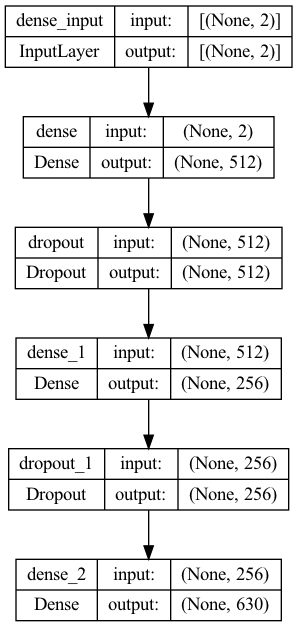

In [63]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot_BMI_Age_'+ split_factor_file_train + '.png', show_shapes=True, show_layer_names=True)

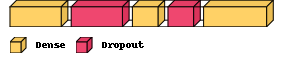

In [64]:
import visualkeras

visualkeras.layered_view(model, legend=True) # without custom font




In [65]:
#from keras_visualizer import visualizer
#visualizer(model, file_format='png', view=True)

In [66]:
model.summary()

def myprint(s):
    with open('modelsummary_BMI_Age_' + split_factor_file_train+ '.txt','a') as f:
        print(s, file=f)

model.summary(print_fn=myprint)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1536      
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 630)               161910    
                                                                 
Total params: 294,774
Trainable params: 294,774
Non-trainable params: 0
_________________________________________________________________


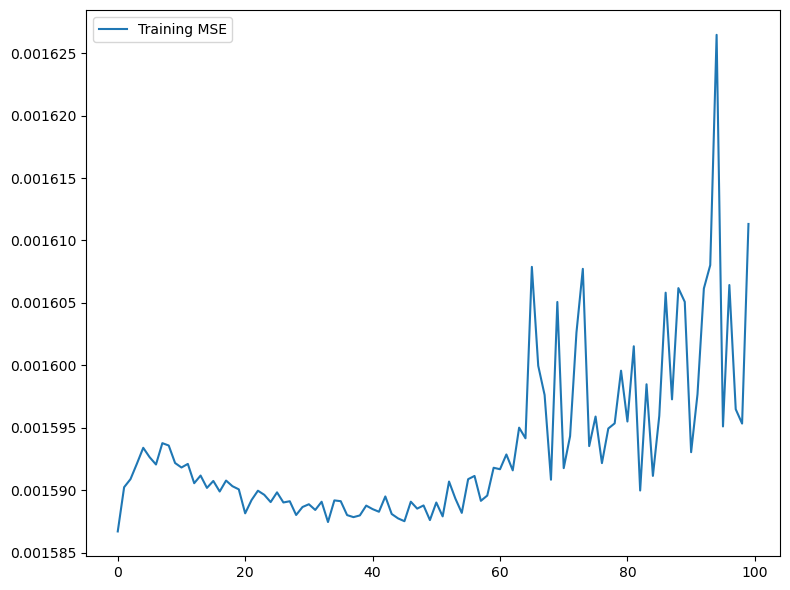

In [67]:


model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch

fig, ax = plt.subplots(1, figsize=(8,6))
num_epochs = model_history.shape[0]

ax.plot(np.arange(0, num_epochs), model_history["val_mse"], 
        label="Training MSE")

ax.legend()

plt.tight_layout()
plt.show()

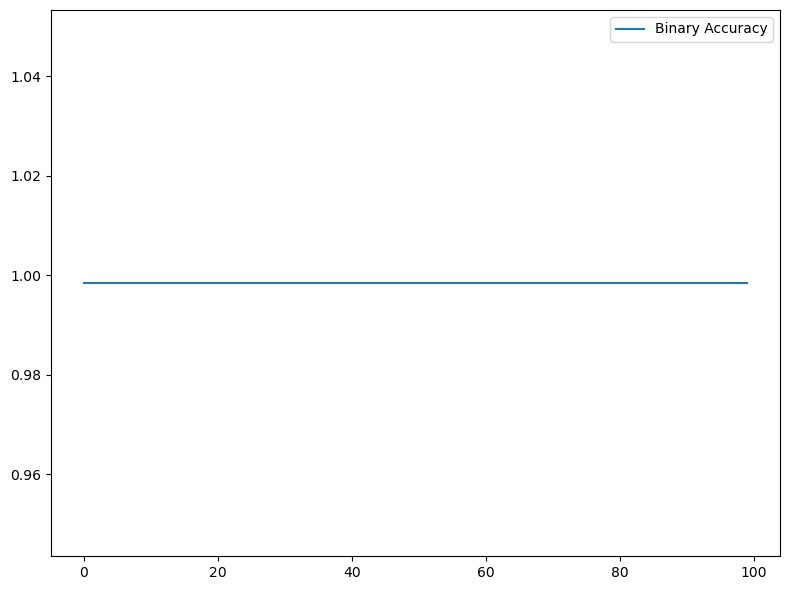

In [68]:
model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch

fig, ax = plt.subplots(1, figsize=(8,6))
num_epochs = model_history.shape[0]

ax.plot(np.arange(0, num_epochs), model_history["val_binary_accuracy"], 
        label="Binary Accuracy")

ax.legend()



plt.tight_layout()
plt.show()

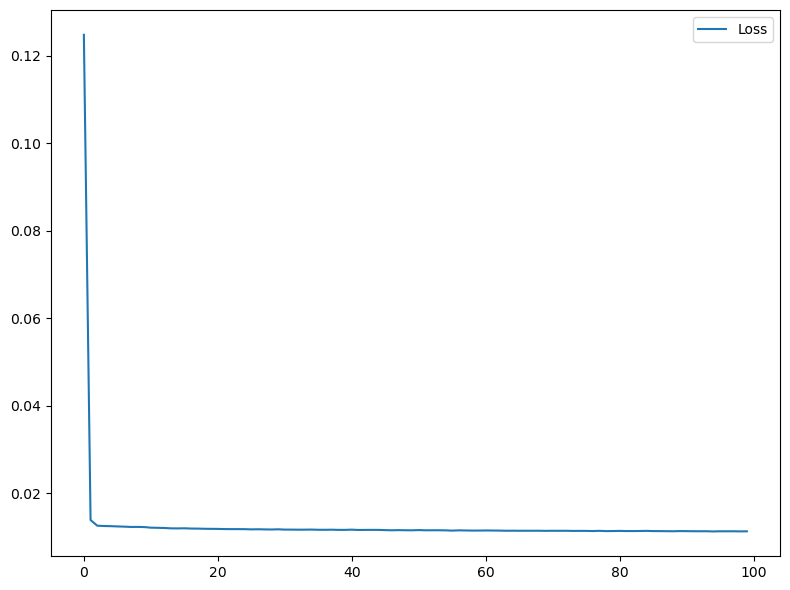

In [69]:
model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch

fig, ax = plt.subplots(1, figsize=(8,6))
num_epochs = model_history.shape[0]

ax.plot(np.arange(0, num_epochs), model_history["loss"], 
        label="Loss")

ax.legend()

plt.tight_layout()
plt.show()

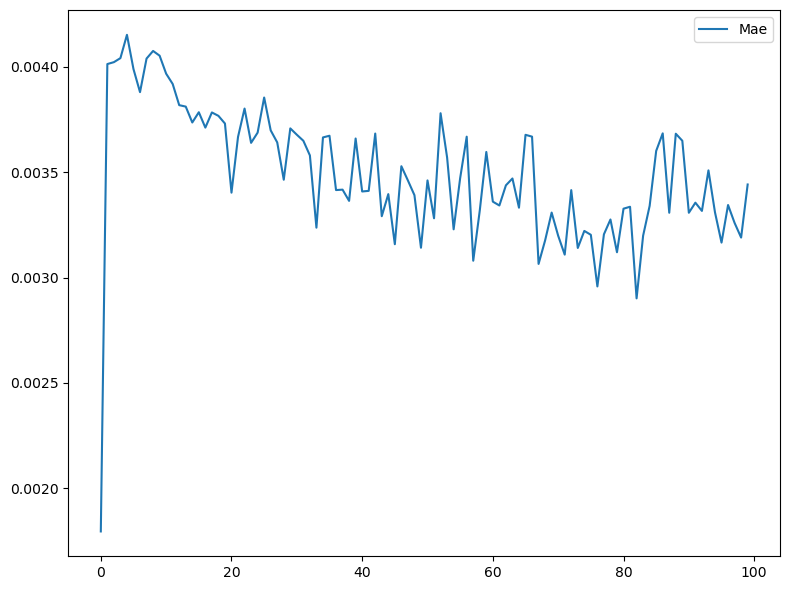

In [70]:
model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch

fig, ax = plt.subplots(1, figsize=(8,6))
num_epochs = model_history.shape[0]

ax.plot(np.arange(0, num_epochs), model_history["val_mae"], 
        label="Mae")

ax.legend()

plt.tight_layout()
plt.show()

In [71]:
#y_test is already ndarray
Z = Y_pred
print(Z.shape)
Y = Y_test
print(Y.shape)
M = confusion_matrix_article(Y,Z)
precision_M = precision_matrix(M)

(471, 630)
(471, 630)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
M is  (630, 630)
|Yi\Zi| =  1.0 , shape =  (630,)
|Zi\Yi| =  0.0 , shape =  (630,)
i =  0
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (630,)
|Zi\Yi| =  0.0 , shape =  (630,)
i =  1
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (630,)
|Zi\Yi| =  0.0 , shape =  (630,)
i =  2
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ...

kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (630,)
|Zi\Yi| =  0.0 , shape =  (630,)
i =  39
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (630,)
|Zi\Yi| =  0.0 , shape =  (630,)
i =  40
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (630,)
|Zi\Yi| =  0.0 , shape =  (630,)
i =  41
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0.

|Yi\Zi| =  1.0 , shape =  (630,)
|Zi\Yi| =  0.0 , shape =  (630,)
i =  83
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (630,)
|Zi\Yi| =  0.0 , shape =  (630,)
i =  84
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (630,)
|Zi\Yi| =  0.0 , shape =  (630,)
i =  85
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape

kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (630,)
|Zi\Yi| =  0.0 , shape =  (630,)
i =  130
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (630,)
|Zi\Yi| =  0.0 , shape =  (630,)
i =  131
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (630,)
|Zi\Yi| =  0.0 , shape =  (630,)
i =  132
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ...

kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (630,)
|Zi\Yi| =  0.0 , shape =  (630,)
i =  177
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (630,)
|Zi\Yi| =  0.0 , shape =  (630,)
i =  178
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (630,)
|Zi\Yi| =  0.0 , shape =  (630,)
i =  179
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ...

kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (630,)
|Zi\Yi| =  0.0 , shape =  (630,)
i =  223
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (630,)
|Zi\Yi| =  0.0 , shape =  (630,)
i =  224
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (630,)
|Zi\Yi| =  0.0 , shape =  (630,)
i =  225
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ...

kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (630,)
|Zi\Yi| =  0.0 , shape =  (630,)
i =  270
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (630,)
|Zi\Yi| =  0.0 , shape =  (630,)
i =  271
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (630,)
|Zi\Yi| =  0.0 , shape =  (630,)
i =  272
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ...

kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (630,)
|Zi\Yi| =  0.0 , shape =  (630,)
i =  316
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (630,)
|Zi\Yi| =  0.0 , shape =  (630,)
i =  317
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (630,)
|Zi\Yi| =  0.0 , shape =  (630,)
i =  318
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ...

kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (630,)
|Zi\Yi| =  0.0 , shape =  (630,)
i =  363
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (630,)
|Zi\Yi| =  0.0 , shape =  (630,)
i =  364
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (630,)
|Zi\Yi| =  0.0 , shape =  (630,)
i =  365
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ...

kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (630,)
|Zi\Yi| =  0.0 , shape =  (630,)
i =  410
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (630,)
|Zi\Yi| =  0.0 , shape =  (630,)
i =  411
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (630,)
|Zi\Yi| =  0.0 , shape =  (630,)
i =  412
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ...

kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (630,)
|Zi\Yi| =  0.0 , shape =  (630,)
i =  457
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (630,)
|Zi\Yi| =  0.0 , shape =  (630,)
i =  458
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (630,)
|Zi\Yi| =  0.0 , shape =  (630,)
i =  459
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ...

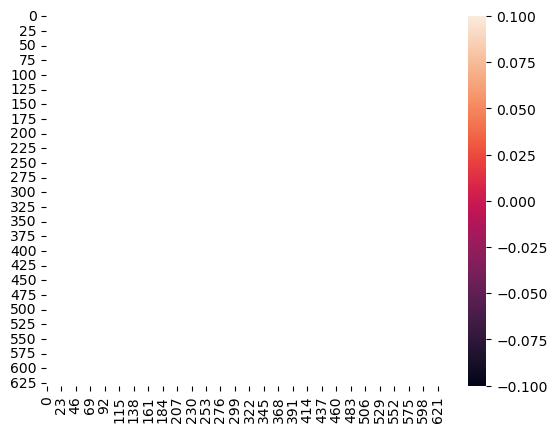

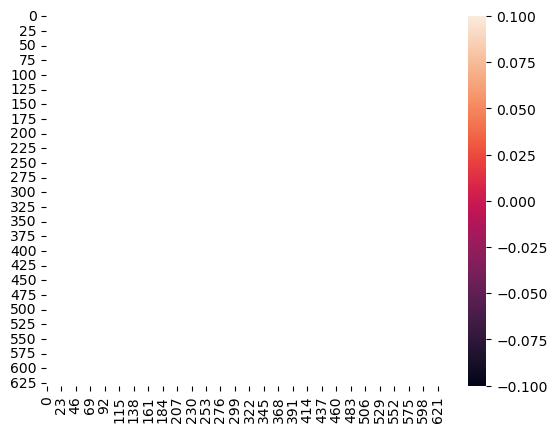

In [72]:
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(M, linewidth=0.5)
plt.show()

ax = sns.heatmap(precision_M, linewidth=0.5)
plt.show()

Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.

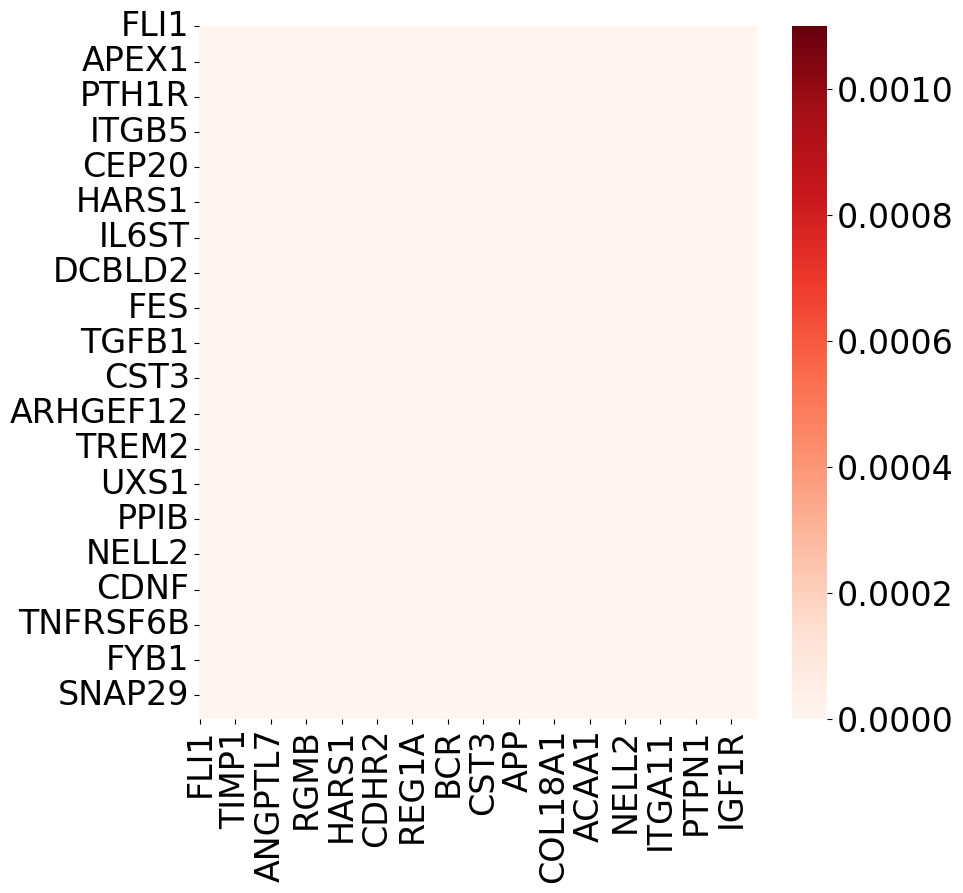

[]


<Figure size 640x480 with 0 Axes>

In [73]:
max_value = np.float64(0)
min_value = np.float64(0)


tp_indices_article = []


for row in range(0,len(precision_M)):
    #max_value = np.float64(max(precision_M[row,:]))
    
    
    #if(max(precision_M[row,:])>0):
    #    print(max(precision_M[row,:]>0))
    #else:
    #    print(max(precision_M[row,:]>0))
    if(max(precision_M[row,:])>0):
        tp_indices_article.append(row)
     
    if(max(precision_M[row,:])>max_value):
        if(max(precision_M[row,:])<1):
            max_value = np.float64(max(precision_M[row,:]))
            
    
    if(min(precision_M[row,:])>min_value):
        min_value = np.float64(min(precision_M[row,:]))
        
    print("Max value: ", max_value, ". Min value: ",min_value) 
    

if(max_value==0):
    max_value = np.float64(0.001)
    
plt.rcParams.update({'font.size': 24})
plt.figure(figsize = (9,9))   
df_precision_M = pd.DataFrame(precision_M, columns = df.iloc[:,:-2].columns, index = df.iloc[:,:-2].columns )
df_precision_M
ax = sns.heatmap(df_precision_M,vmin=min_value, vmax=max_value*1.1, cmap="Reds")
plt.savefig("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/BMI_Age/ML Models/Deep/CM_Deep_" + split_factor_file_train + "_article.eps", transparent=True, format='png', bbox_inches = 'tight')
plt.rcParams.update({'font.size': 10})
                    
plt.show()

plt.clf()


#rows que testaram true positive    
proteins_confusion_matrix_article = []
print(tp_indices_article)
if (len(tp_indices_article)>0):
    for i in tp_indices_article:
        proteins_confusion_matrix_article.append(df.columns[i])
        print(df.columns[i])
    proteins_confusion_matrix_article.append(max_value)
    pd.DataFrame(proteins_confusion_matrix_article).to_csv("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/BMI_Age/ML Models/Deep/true_positive_proteins_BMI_Age_" + split_factor_file_train + ".csv") 


In [74]:
# equivalent to print(hamming_loss(y_test, previsto.toarray())) 
print(hamming_loss(Y_test, Y_pred).numpy())
print(hamming_loss(Y_test, Y_pred).numpy()[0])

[0.0015873 0.0015873 0.0015873 0.0015873 0.0015873 0.0015873 0.0015873
 0.0015873 0.0015873 0.0015873 0.0015873 0.0015873 0.0015873 0.0015873
 0.0015873 0.0015873 0.0015873 0.0015873 0.0015873 0.0015873 0.0015873
 0.0015873 0.0015873 0.0015873 0.0015873 0.0015873 0.0015873 0.0015873
 0.0015873 0.0015873 0.0015873 0.0015873 0.0015873 0.0015873 0.0015873
 0.0015873 0.0015873 0.0015873 0.0015873 0.0015873 0.0015873 0.0015873
 0.0015873 0.0015873 0.0015873 0.0015873 0.0015873 0.0015873 0.0015873
 0.0015873 0.0015873 0.0015873 0.0015873 0.0015873 0.0015873 0.0015873
 0.0015873 0.0015873 0.0015873 0.0015873 0.0015873 0.0015873 0.0015873
 0.0015873 0.0015873 0.0015873 0.0015873 0.0015873 0.0015873 0.0015873
 0.0015873 0.0015873 0.0015873 0.0015873 0.0015873 0.0015873 0.0015873
 0.0015873 0.0015873 0.0015873 0.0015873 0.0015873 0.0015873 0.0015873
 0.0015873 0.0015873 0.0015873 0.0015873 0.0015873 0.0015873 0.0015873
 0.0015873 0.0015873 0.0015873 0.0015873 0.0015873 0.0015873 0.0015873
 0.001

<class 'numpy.ndarray'>
0.0
0.4158730158730159
0.4158730158730159
0.0
[[[471   0]
  [  0   0]]

 [[471   0]
  [  0   0]]

 [[470   1]
  [  0   0]]

 ...

 [[471   0]
  [  0   0]]

 [[471   0]
  [  0   0]]

 [[469   2]
  [  0   0]]]
[[[471   0]
  [  0   0]]

 [[471   0]
  [  0   0]]

 [[470   0]
  [  1   0]]

 ...

 [[471   0]
  [  0   0]]

 [[471   0]
  [  0   0]]

 [[469   0]
  [  2   0]]]
cm =  [[296259      0]
 [   471      0]]
630
368
[2, 3, 4, 6, 7, 8, 9, 10, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 29, 30, 32, 34, 35, 36, 39, 44, 45, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 64, 65, 66, 67, 69, 70, 74, 77, 83, 84, 86, 88, 90, 93, 94, 95, 97, 98, 99, 102, 103, 105, 106, 107, 108, 109, 110, 111, 113, 115, 116, 117, 119, 120, 123, 124, 125, 128, 131, 134, 136, 138, 144, 145, 146, 147, 148, 149, 150, 151, 152, 154, 155, 156, 158, 159, 166, 167, 169, 176, 177, 179, 181, 182, 184, 186, 187, 188, 189, 190, 193, 194, 197, 200, 201, 203, 204, 205, 206, 209, 210, 2

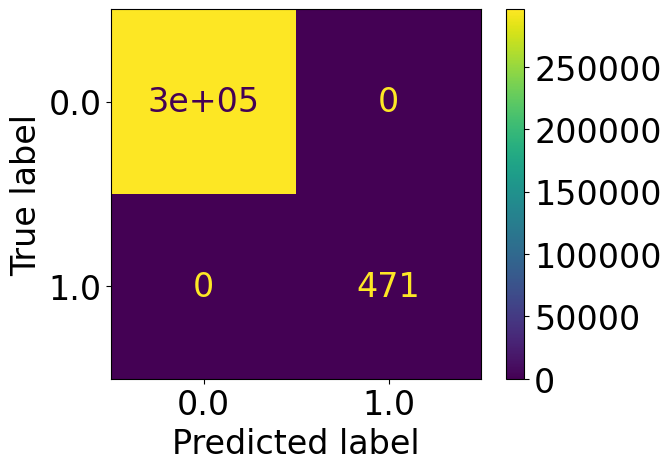

<Figure size 640x480 with 0 Axes>

In [75]:
# https://towardsdatascience.com/evaluating-multi-label-classifiers-a31be83da6ea 

from sklearn.metrics import multilabel_confusion_matrix
result = multilabel_confusion_matrix(Y_test, Y_pred)[0]
result = multilabel_confusion_matrix(Y_test, Y_pred)
result

print(type(Y_pred))

from sklearn.metrics import jaccard_score
print(jaccard_score(Y_pred,Y_test, average='samples', zero_division=True))
print(jaccard_score(Y_pred,Y_test, average='macro',zero_division=True))
print(jaccard_score(Y_pred,Y_test, average='weighted',zero_division=True))
print(jaccard_score(Y_pred,Y_test, average='micro',zero_division=True))

from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay
print(multilabel_confusion_matrix(Y_pred,Y_test))


matrices = multilabel_confusion_matrix(Y_test, Y_pred)
print(matrices)

cm = confusion_matrix(Y_test.ravel(), Y_pred.ravel())
print("cm = ", cm)

# Create a ConfusionMatrixDisplay object
#cmd = ConfusionMatrixDisplay(cm, display_labels=[f"Class {i}" for i in range(2)])
plt.rcParams.update({'font.size': 24})
cmd = ConfusionMatrixDisplay.from_predictions(Y_test.ravel(), Y_test.ravel())
# Display the confusion matrix
cmd.plot()
plt.savefig("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/BMI_Age/ML Models/Deep/CM_Deep_" + split_factor_file_train + "_flattened.eps", transparent=True, format='png',bbox_inches = 'tight')
plt.rcParams.update({'font.size': 10})
plt.clf()


num_classes = len(matrices)
print(num_classes)
# Initialize an empty list to store the true positive row indices
tp_indices = []
sum1 = 0
# Iterate over each class
for i in range(num_classes):
    # Get the confusion matrix for the current class
    class_cm = matrices[i]
    #print(class_cm)
    
    # Extract the true positive count from the confusion matrix
    tp = class_cm[1, 0]
   
    # If the true positive count is greater than 0, add the index to the list
    if tp > 0:
        sum1+=1
        tp_indices.append(i)

        
        
print(sum1)      
#rows que testaram true positive        
print(tp_indices)
proteins_confusion_matrix_flattened = []
if (len(tp_indices)>0):
    for i in tp_indices:
        print(df.columns[i])
        proteins_confusion_matrix_flattened.append(df.columns[i])
    pd.DataFrame(proteins_confusion_matrix_flattened).to_csv("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/BMI_Age/ML Models/Deep/true_positive_proteins__flattened_BMI_Age_" + split_factor_file_train + ".csv") 
        

true_positive_indices = np.where(matrices[:, 1, 1] == 1)[0]
print(true_positive_indices)



In [76]:
df_model_scores = pd.read_csv("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/BMI_Age/ML Models/Scores_BMI_Age_"+split_factor_file_train+".csv")
df_model_scores = df_model_scores.drop(['Unnamed: 0'], axis=1)
df_model_scores.head(20)

,Model,Proportion,HL,Prec,Rec,F1,Jac
0,MLKNN,60_40,0.001587,1.000000,0.415873,0.415873,0.415873
1,HARAM,60_40,0.044387,0.794085,0.445026,0.332585,0.332172
2,BR_MultinomialNB,60_40,0.001587,1.000000,0.415873,0.415873,0.415873
3,Label Powerset GradientBooster,60_40,0.003154,0.990651,0.418519,0.414584,0.414442
4,ClassifierChain,60_40,0.003168,0.996831,0.417460,0.415884,0.415879
5,Label Powerset SVC,60_40,0.003168,0.995280,0.417460,0.414367,0.414327
6,RandomForest,60_40,0.001587,1.000000,0.415873,0.415873,0.415873
7,DecisionTree,60_40,0.001624,0.998535,0.416402,0.416071,0.415979
8,SVM,60_40,0.608732,0.172638,0.769735,0.070663,0.069463
9,BR_kNN,60_40,0.001587,1.000000,0.415873,0.415873,0.415873


In [77]:
from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(Y_test, Y_pred, average='macro',zero_division=1))



#define rows to add
rows_to_append = pd.DataFrame([{'Model':'Deep', 'Proportion':split_factor_file_train, 
                                'HL':hamming_loss(Y_test, Y_pred).numpy()[0],
                               'Prec':precision_recall_fscore_support(Y_pred,Y_test, average='macro',zero_division=1)[0],
                               'Rec':precision_recall_fscore_support(Y_pred,Y_test, average='macro',zero_division=1)[1],
                               'F1':precision_recall_fscore_support(Y_pred,Y_test, average='macro',zero_division=1)[2],
                               'Jac':jaccard_score(Y_pred,Y_test, average='macro',zero_division=True)}])
                           

#add row to empty DataFrame
df_model_scores = pd.concat([df_model_scores, rows_to_append])
df_model_scores.head()

df_model_scores.to_csv("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/BMI_Age/ML Models/Scores_BMI_Age_" + split_factor_file_train + ".csv") 

(1.0, 0.4158730158730159, 0.4158730158730159, None)
